In [1]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pandas as pd


In [2]:
def silhouette(filename):
  data = pd.read_csv(filename)
  # Range of values for k #
  range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
  for n_clusters in range_n_clusters:
    plt.figure()
    # Silhouette Co-efficient ranges from -1 to 1 #
    plt.xlim([-1, 1])
    plt.ylim([0, len(data) + (n_clusters + 1) * 10])
    # Initialize the clusterer with n_clusters value and a random generator #
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(data)
    # The silhouette_score gives the average value for all the samples. #
    # This gives a perspective into the density and separation of the formed clusters #
    silhouette_avg = silhouette_score(data, cluster_labels)
    print("For # clusters = ", n_clusters,
          "The average silhouette_score is : ", silhouette_avg)
    sample_silhouette_values = silhouette_samples(data, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them #
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / n_clusters)
        plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
        # Label the silhouette plots with their cluster numbers at the middle
        plt.text(-0.15, y_lower + 0.5 * size_cluster_i, str(i))
        # Compute the new y_lower for next plot #
        y_lower = y_upper + 10  # 10 for the 0 samples #
    plt.title("The silhouette plot for the various clusters.")
    plt.xlabel("The silhouette coefficient values")
    plt.ylabel("Cluster label")
    # line for average silhouette score of all the values #
    plt.axvline(x=silhouette_avg, color="red", linestyle="--")
    plt.yticks([])
    plt.xticks([-1, -0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.title(("Silhouette analysis for KMeans clustering on Dataset "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
  plt.show()
  return

In [3]:
united_data = ["/content/united_pt1.csv","/content/united_pt2.csv","/content/united_moyes.csv","/content/united_lvg_2.csv","/content/united_lvg_1.csv","/content/united_jose_x_ole.csv","/content/united_combined.csv"]
city_data = ["/content/city_pt1.csv","/content/city_pt2.csv","/content/city_pep.csv","/content/city_pellegrini_2.csv","/content/city_pellegrini_1.csv","/content/13-14 Title.csv","/content/17-18 and 18:19 Titles.csv","/content/city_combined.csv"]

-------------------------------- Silhouette Values for 2013/14-2014/15 Seasons (United) --------------------------------
For # clusters =  2 The average silhouette_score is :  0.6122980205481935
For # clusters =  3 The average silhouette_score is :  0.5357154867770438
For # clusters =  4 The average silhouette_score is :  0.5104549798684642
For # clusters =  5 The average silhouette_score is :  0.4976421730638001
For # clusters =  6 The average silhouette_score is :  0.5153542085482956
For # clusters =  7 The average silhouette_score is :  0.46391344447814675
For # clusters =  8 The average silhouette_score is :  0.4970166890092216
For # clusters =  9 The average silhouette_score is :  0.4840122940705586
For # clusters =  10 The average silhouette_score is :  0.469748347465796


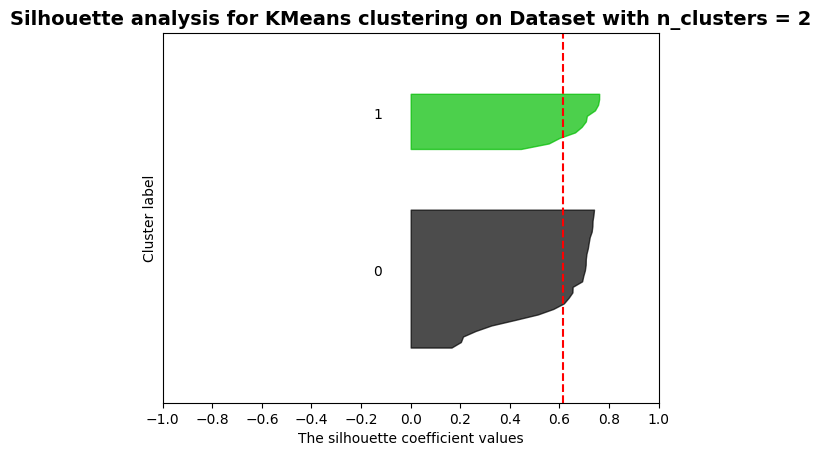

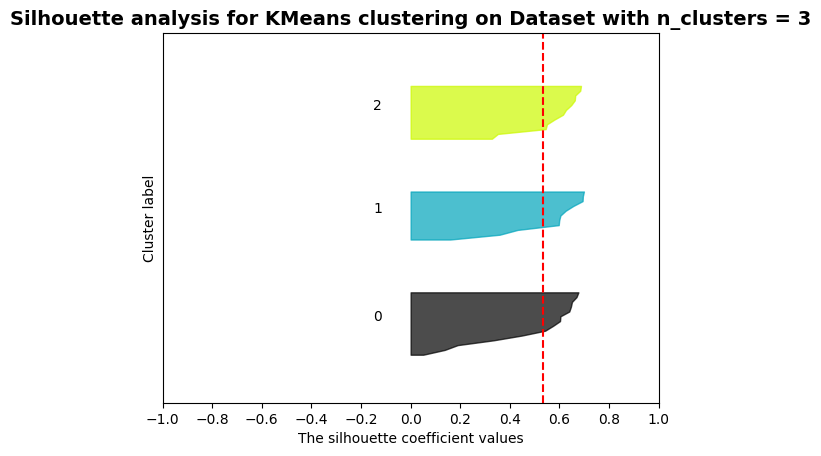

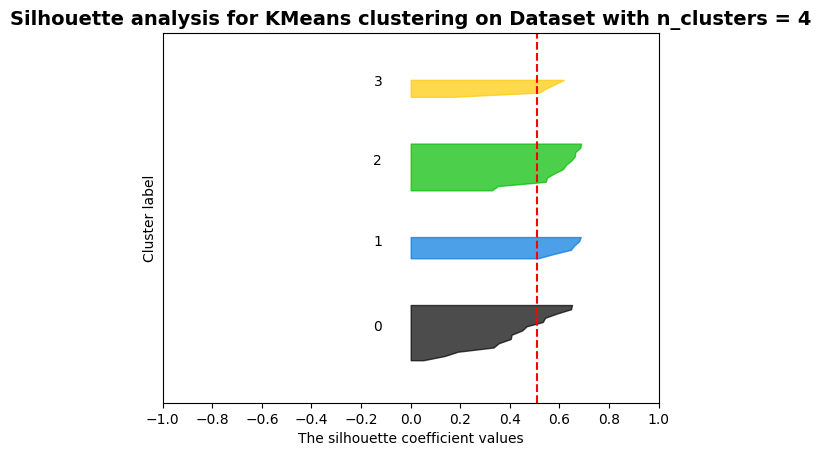

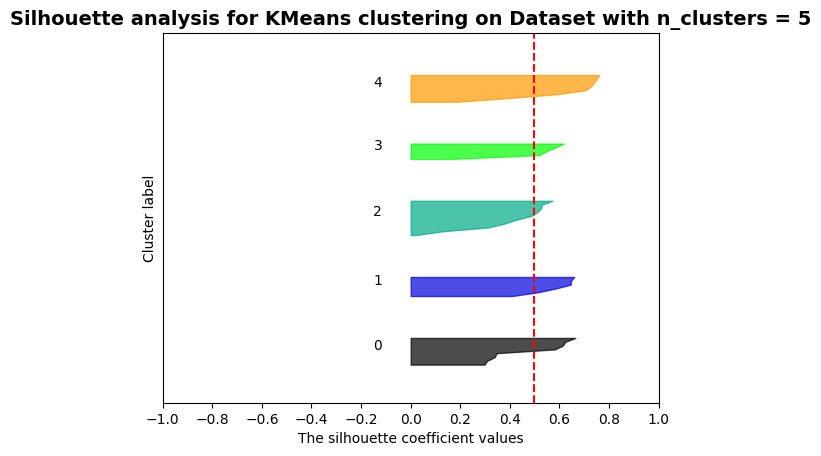

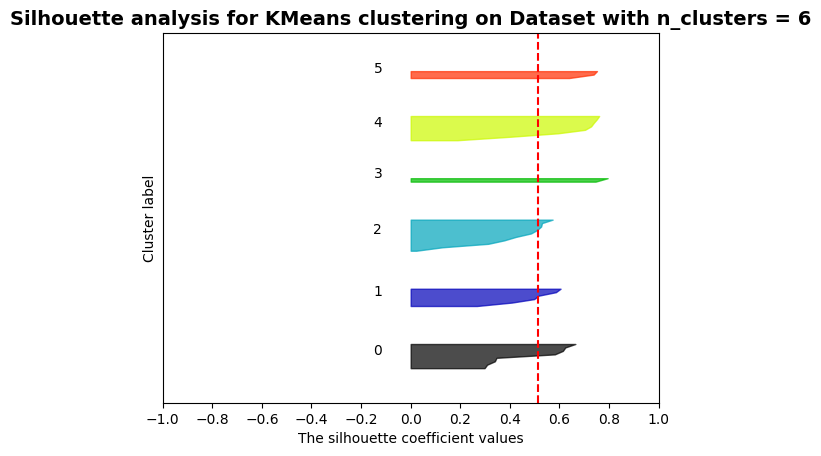

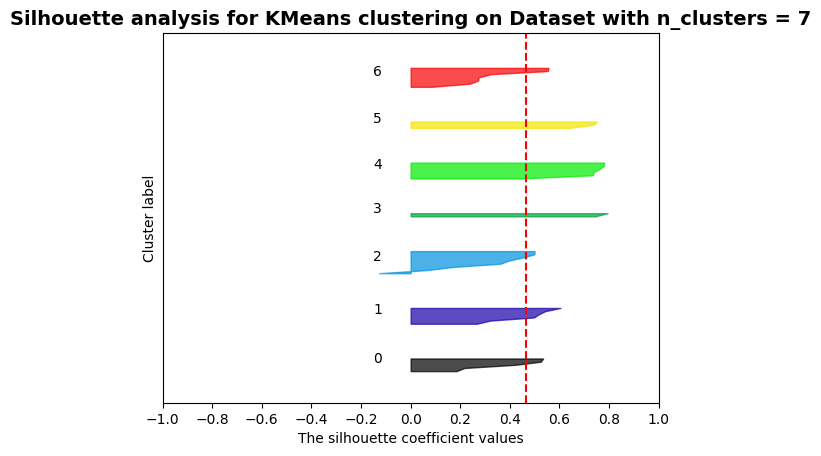

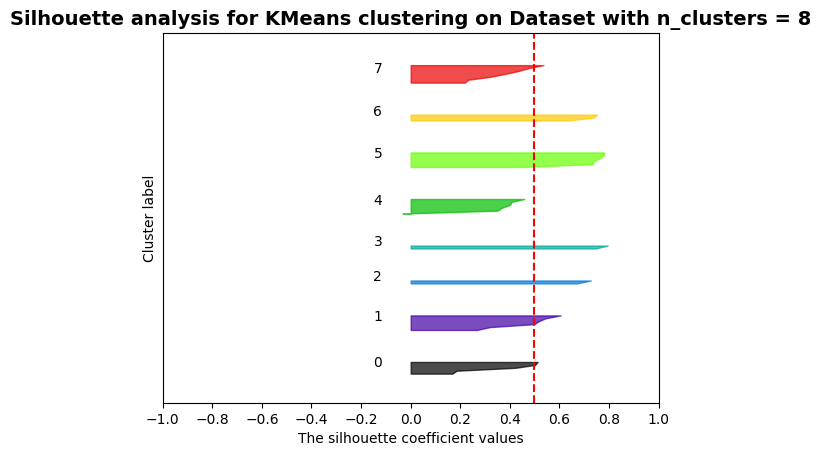

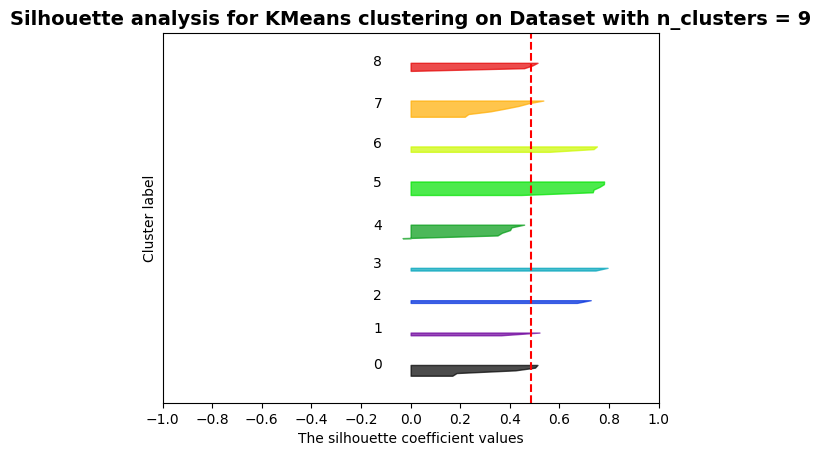

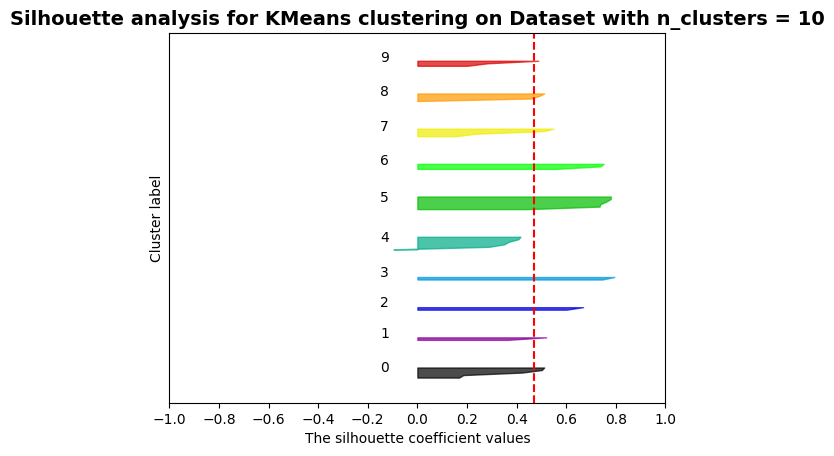

-------------------------------- Silhouette Values for 2013/14-2014/15 Seasons (City) --------------------------------
For # clusters =  2 The average silhouette_score is :  0.6859277360671959
For # clusters =  3 The average silhouette_score is :  0.633865327210168
For # clusters =  4 The average silhouette_score is :  0.5630454708194497
For # clusters =  5 The average silhouette_score is :  0.5471912961101704
For # clusters =  6 The average silhouette_score is :  0.5406008053179336
For # clusters =  7 The average silhouette_score is :  0.5564489017214101
For # clusters =  8 The average silhouette_score is :  0.46304394761231504
For # clusters =  9 The average silhouette_score is :  0.4569047010919876
For # clusters =  10 The average silhouette_score is :  0.41402540818363504


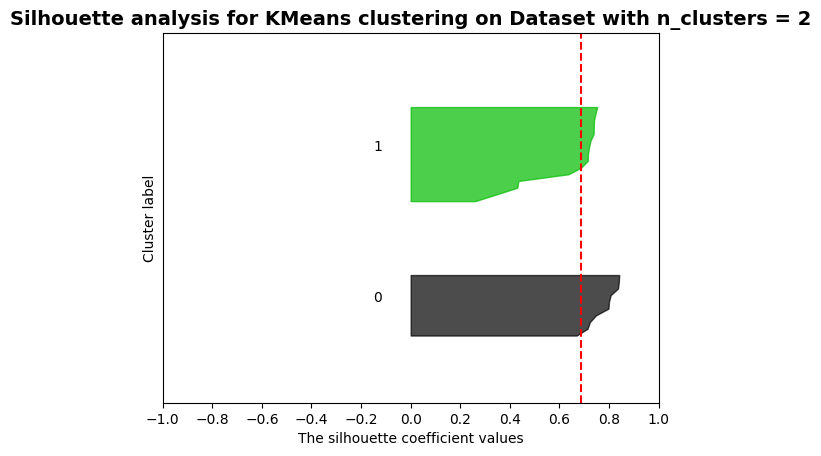

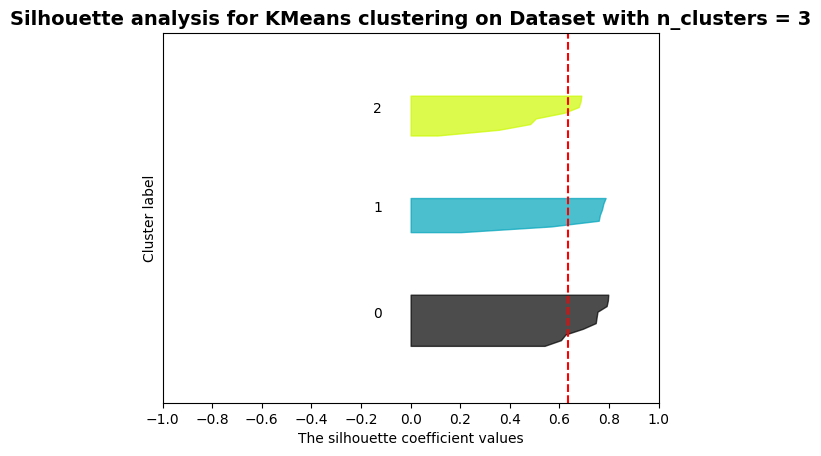

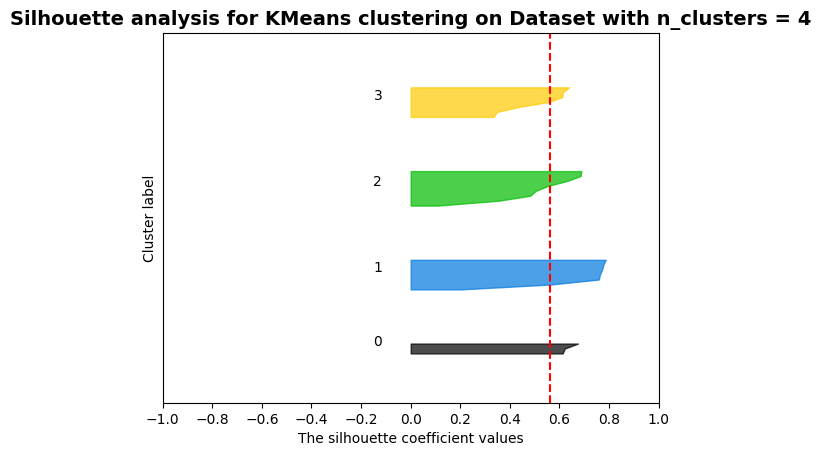

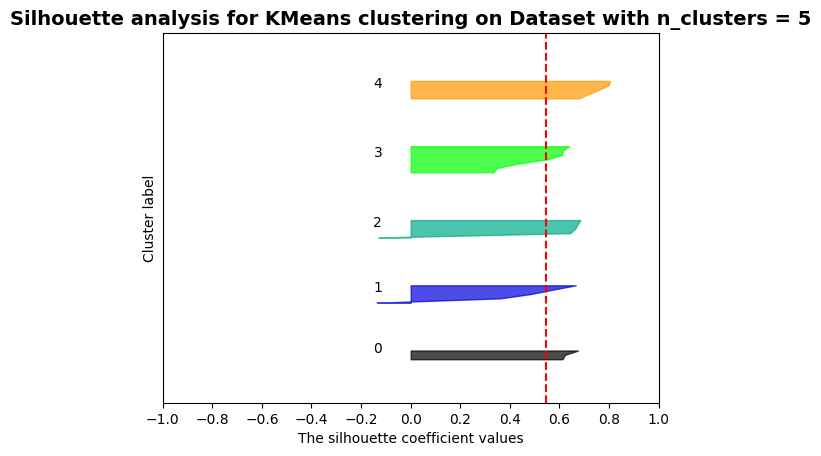

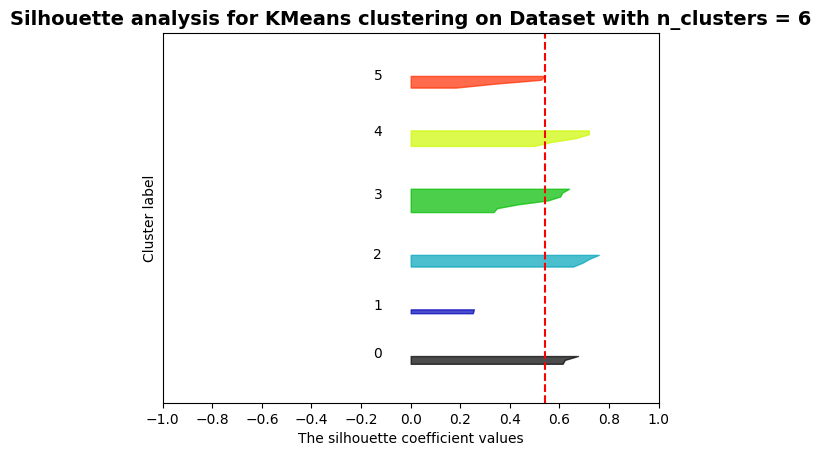

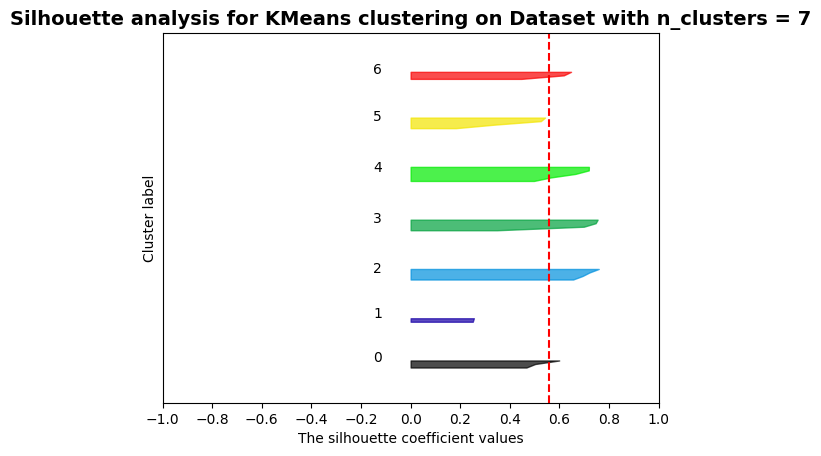

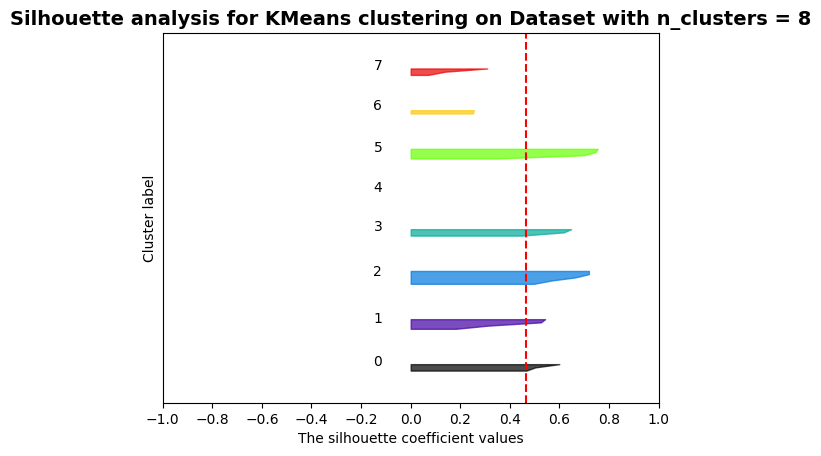

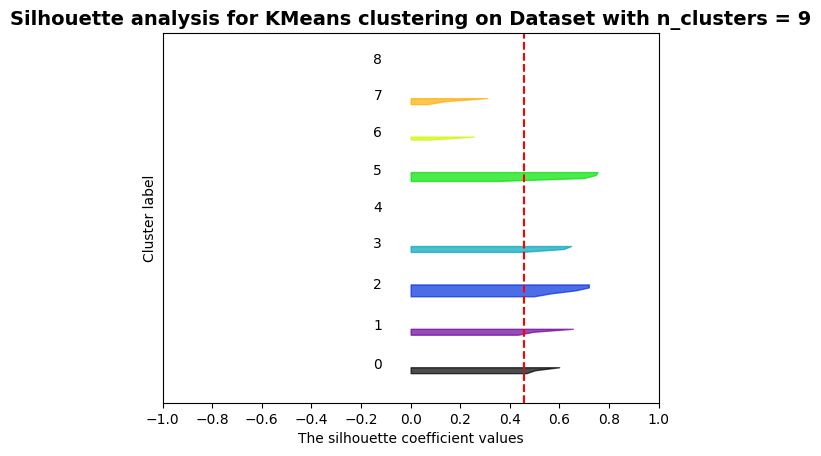

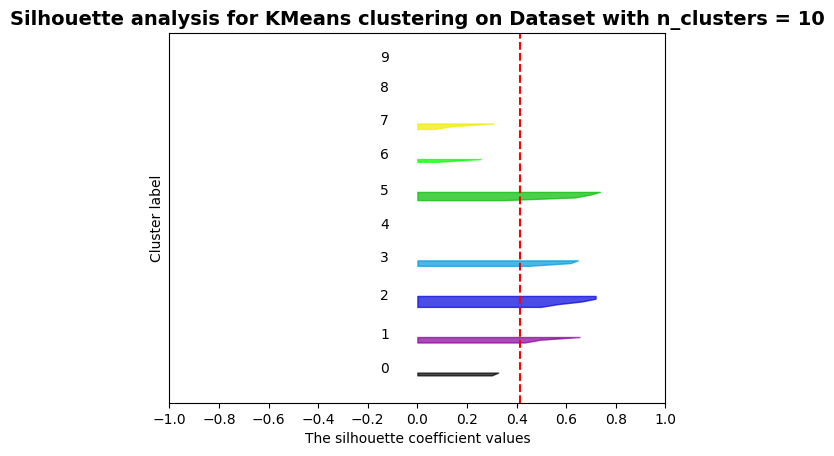

In [4]:
#2013-2015 Seasons --------------- Pre-xG Era ----------------------------------------- United and City #
print("-------------------------------- Silhouette Values for 2013/14-2014/15 Seasons (United) --------------------------------")
silhouette(united_data[0])
print("-------------------------------- Silhouette Values for 2013/14-2014/15 Seasons (City) --------------------------------")
silhouette(city_data[0])

-------------------------------- Silhouette Values for 2015/16-2018/19 Seasons (United) --------------------------------
For # clusters =  2 The average silhouette_score is :  0.6453672297149966
For # clusters =  3 The average silhouette_score is :  0.5480894884006121
For # clusters =  4 The average silhouette_score is :  0.4969080431100989
For # clusters =  5 The average silhouette_score is :  0.5050342104089819
For # clusters =  6 The average silhouette_score is :  0.42852766508061424
For # clusters =  7 The average silhouette_score is :  0.43645699034992
For # clusters =  8 The average silhouette_score is :  0.42384890971436145
For # clusters =  9 The average silhouette_score is :  0.39190918716325274
For # clusters =  10 The average silhouette_score is :  0.3524069546046501


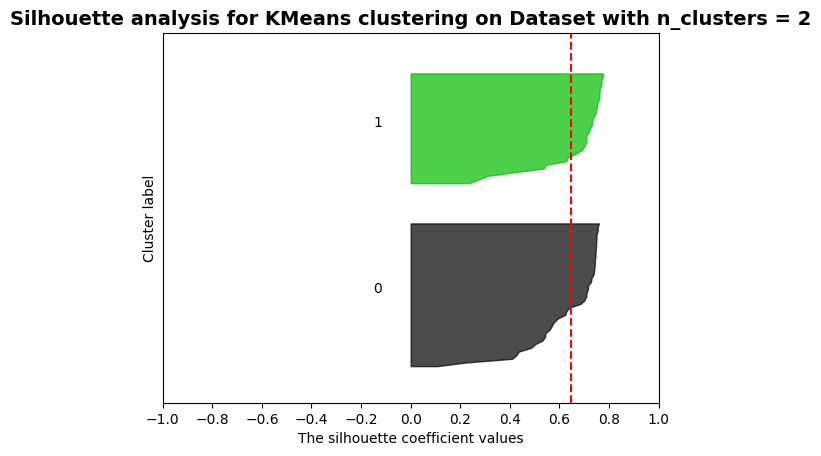

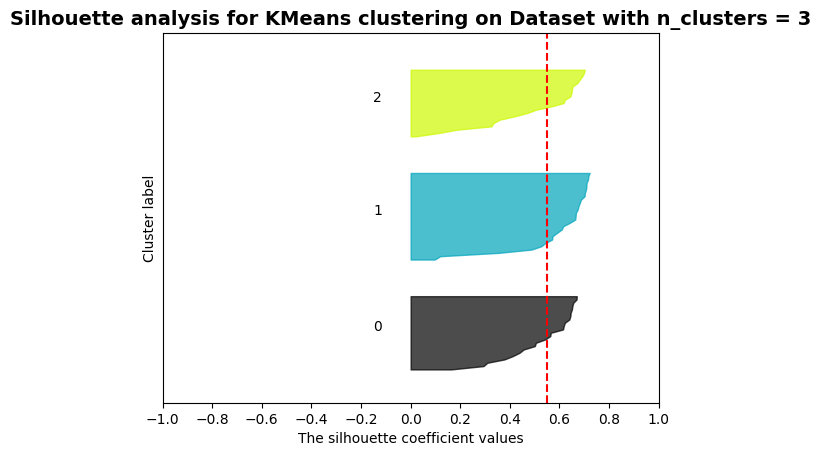

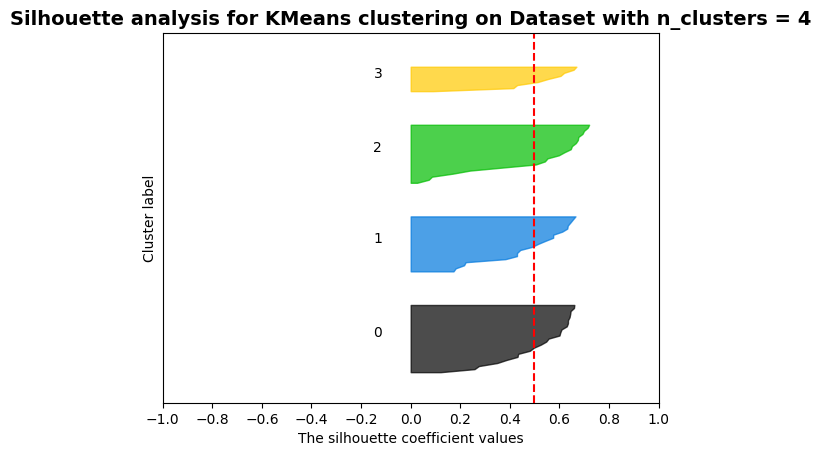

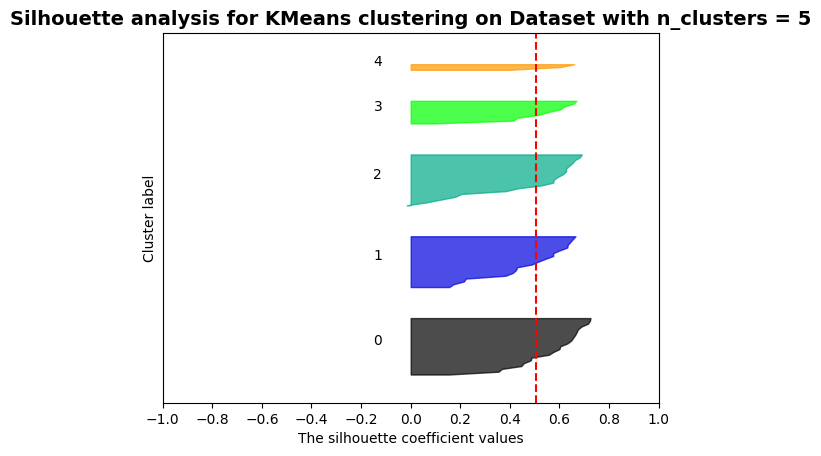

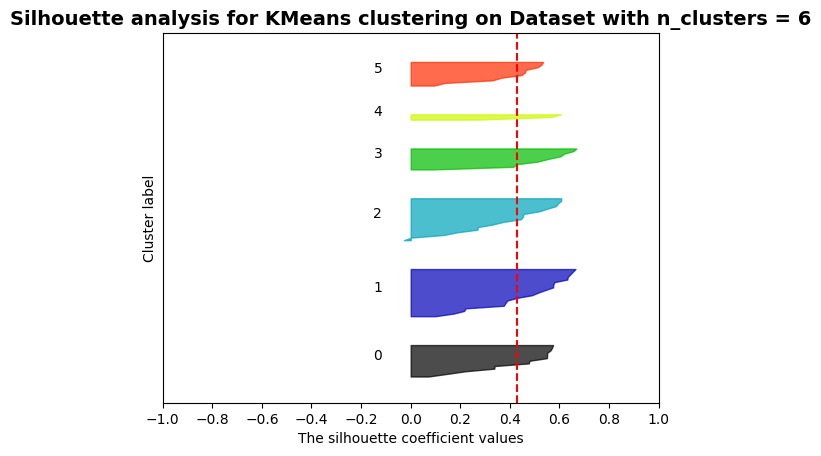

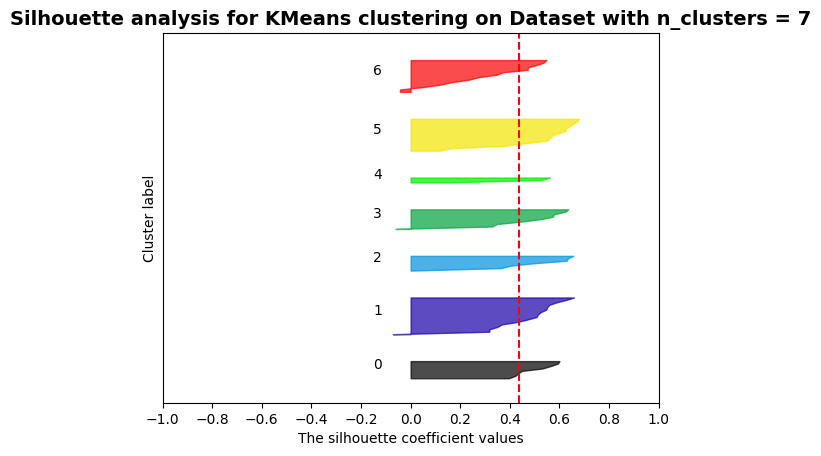

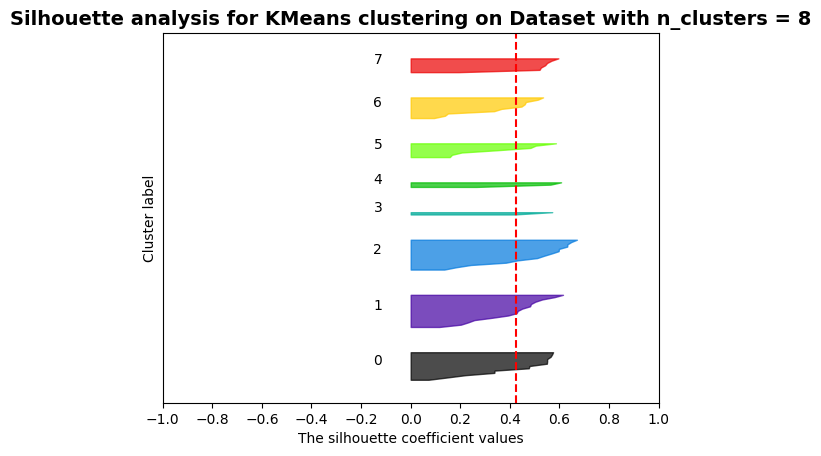

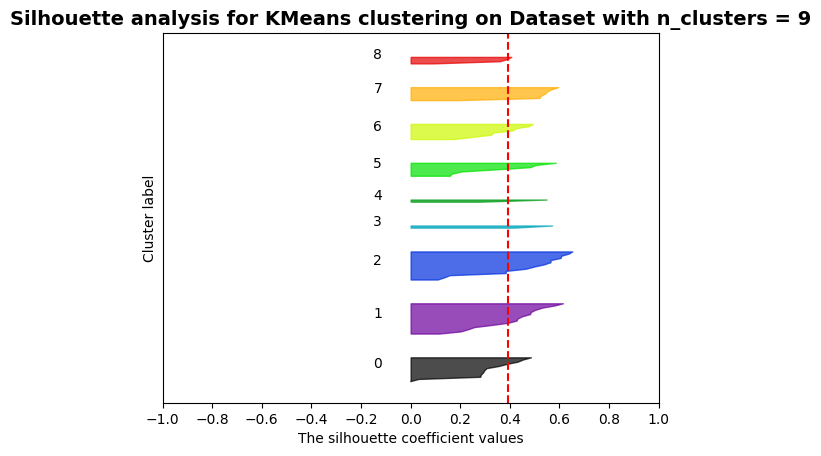

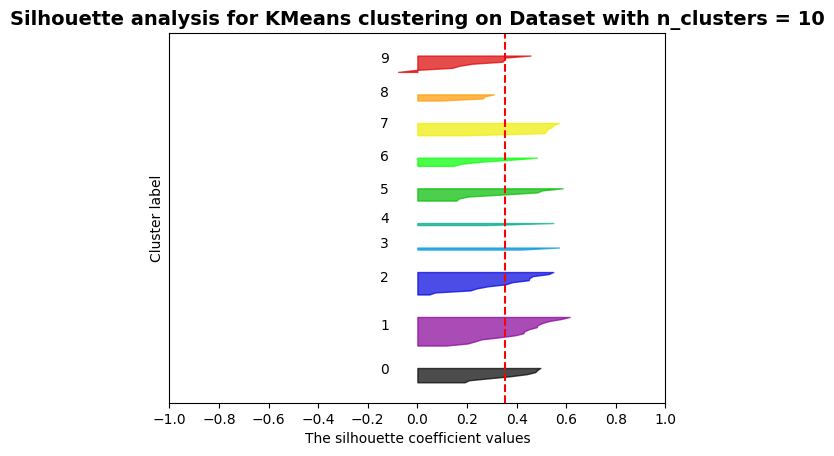

-------------------------------- Silhouette Values for 2015/16-2018/19 Seasons (City) --------------------------------
For # clusters =  2 The average silhouette_score is :  0.6541872287108944
For # clusters =  3 The average silhouette_score is :  0.60813804484955
For # clusters =  4 The average silhouette_score is :  0.5820856036286854
For # clusters =  5 The average silhouette_score is :  0.4757936721098266
For # clusters =  6 The average silhouette_score is :  0.47278295507079154
For # clusters =  7 The average silhouette_score is :  0.4870598033625884
For # clusters =  8 The average silhouette_score is :  0.43999782331537934
For # clusters =  9 The average silhouette_score is :  0.42802238720000196
For # clusters =  10 The average silhouette_score is :  0.39820202939823995


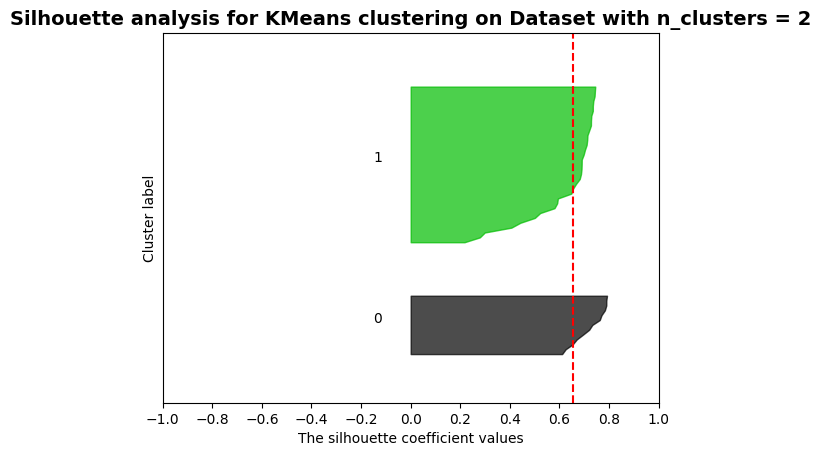

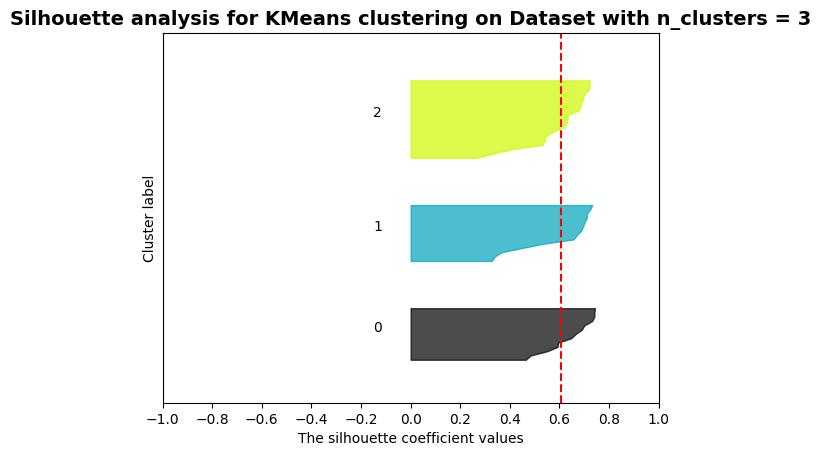

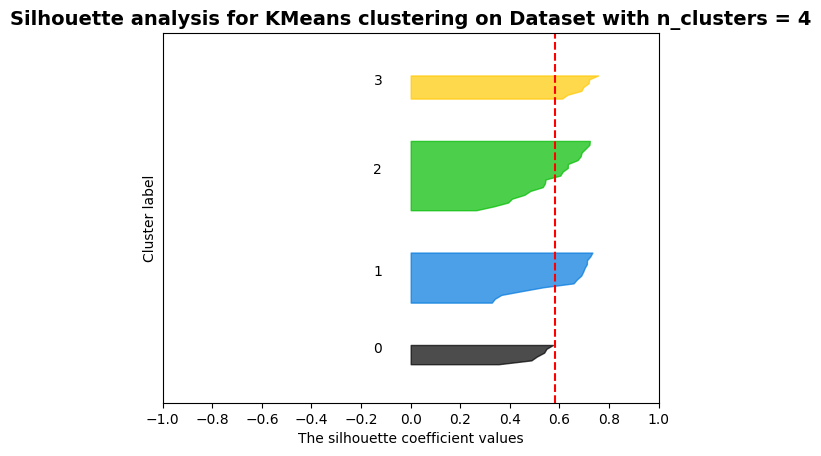

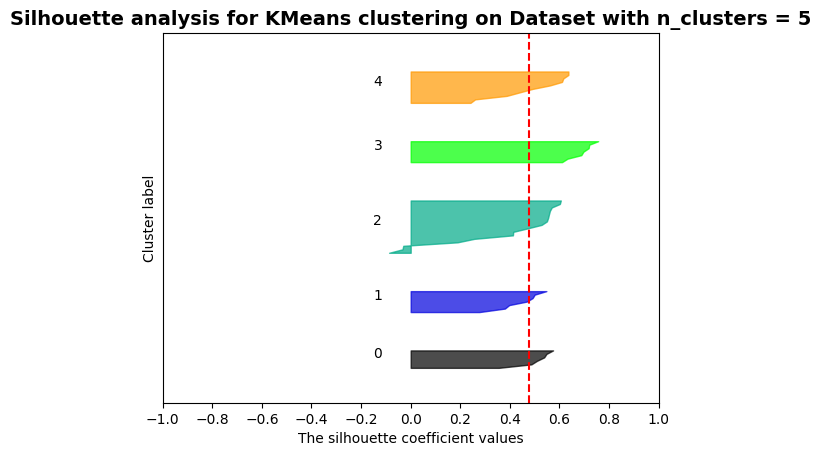

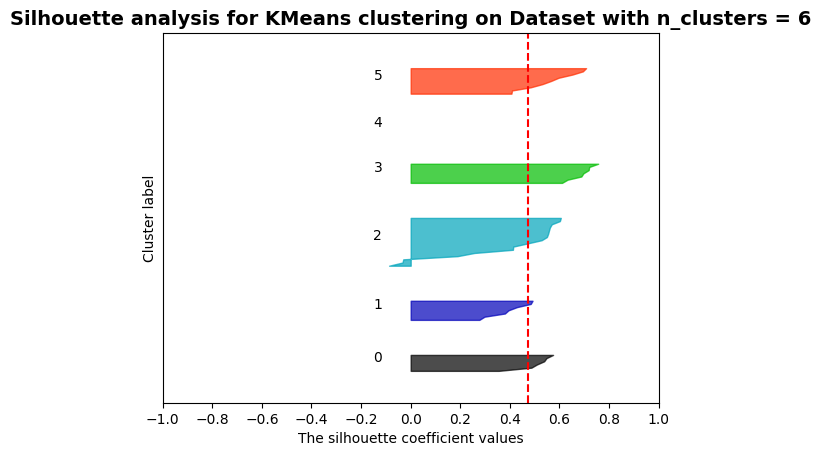

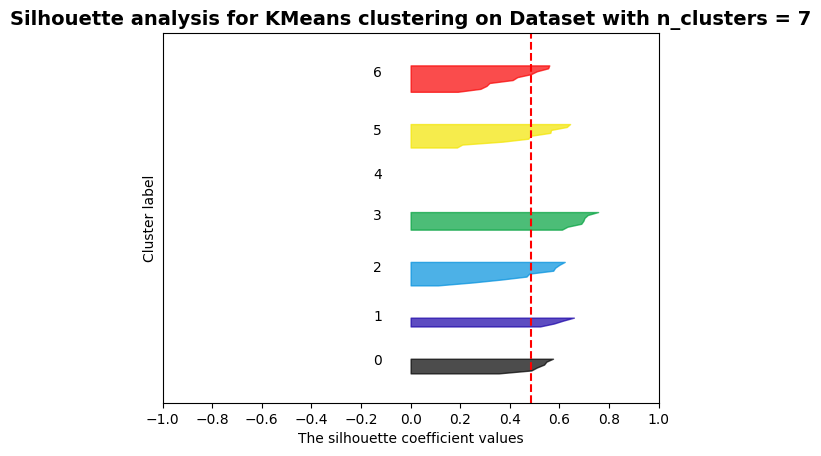

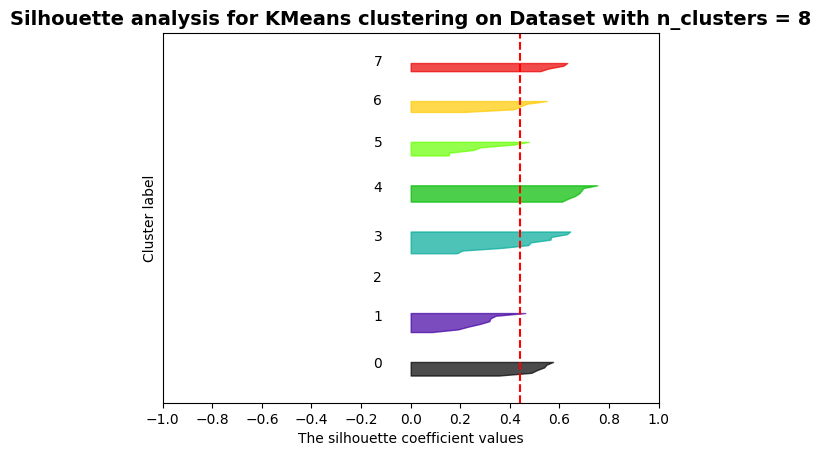

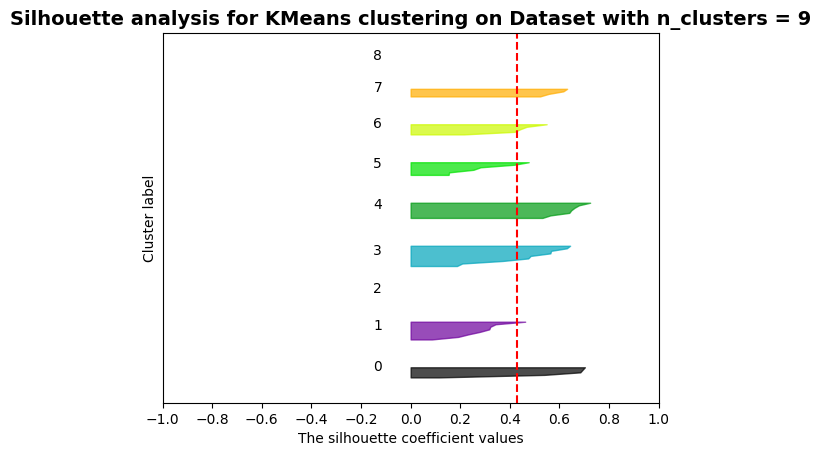

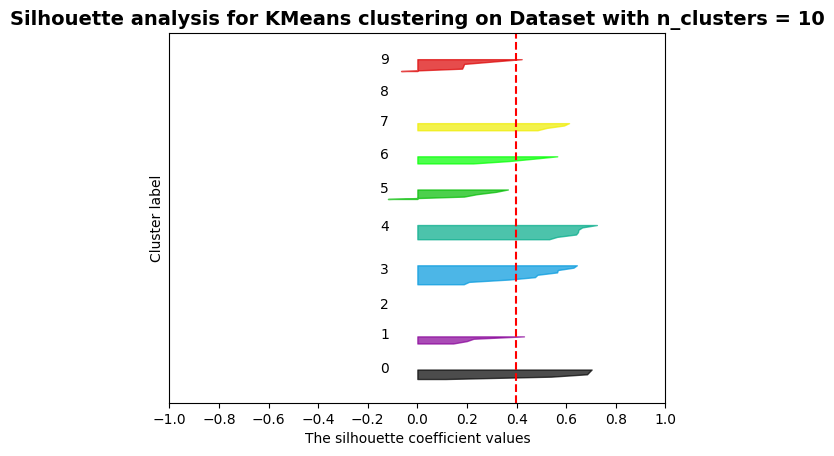

In [6]:
#2015-2019 Seasons --------------- xG Era ----------------------------------------- United and City #
print("-------------------------------- Silhouette Values for 2015/16-2018/19 Seasons (United) --------------------------------")
silhouette(united_data[1])
print("-------------------------------- Silhouette Values for 2015/16-2018/19 Seasons (City) --------------------------------")
silhouette(city_data[1])

-------------------------------- Silhouette Values for David Moyes (2013/14) --------------------------------
For # clusters =  2 The average silhouette_score is :  0.6869940658365316
For # clusters =  3 The average silhouette_score is :  0.6393582661961468
For # clusters =  4 The average silhouette_score is :  0.5880853211382489
For # clusters =  5 The average silhouette_score is :  0.5311973296666931
For # clusters =  6 The average silhouette_score is :  0.5459310808523353
For # clusters =  7 The average silhouette_score is :  0.5022123283411848
For # clusters =  8 The average silhouette_score is :  0.436857073020711
For # clusters =  9 The average silhouette_score is :  0.4387165845885357
For # clusters =  10 The average silhouette_score is :  0.3488227003975222


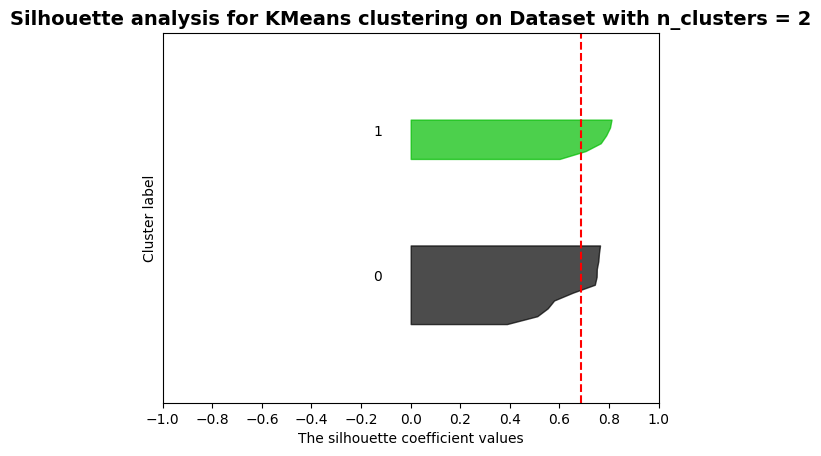

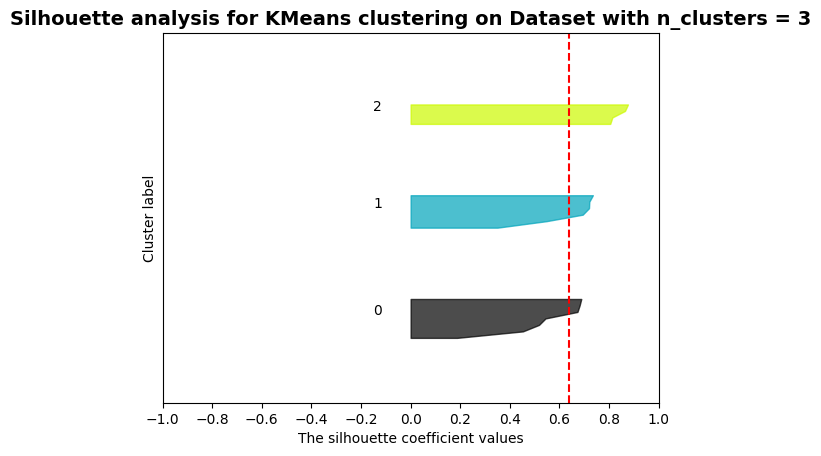

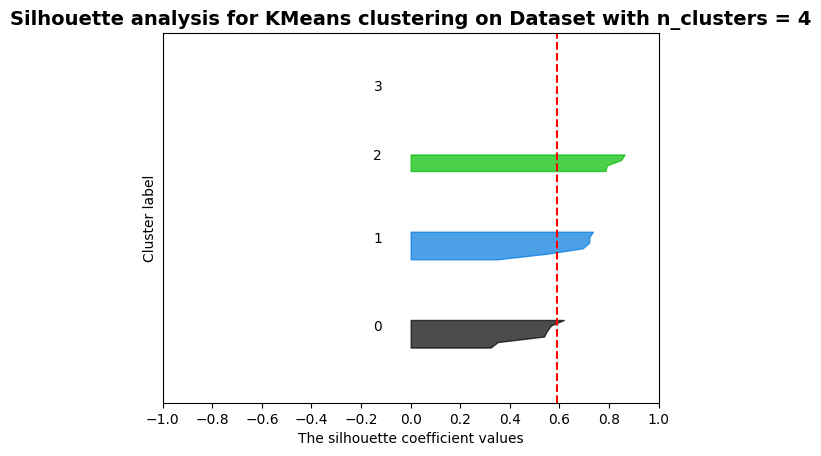

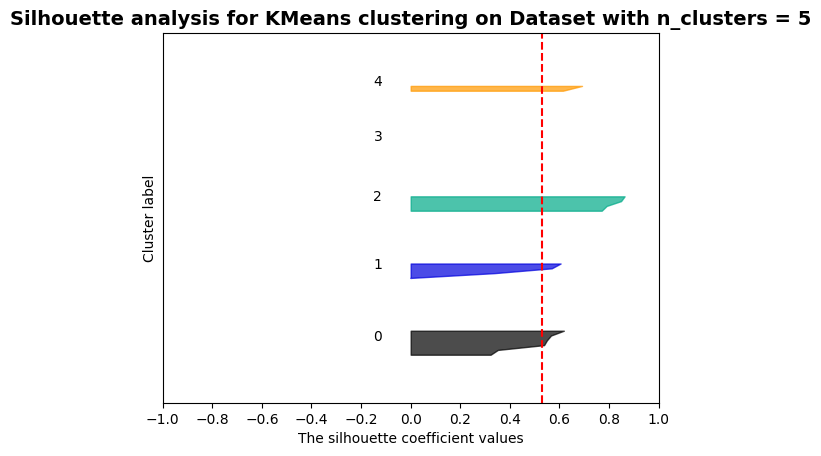

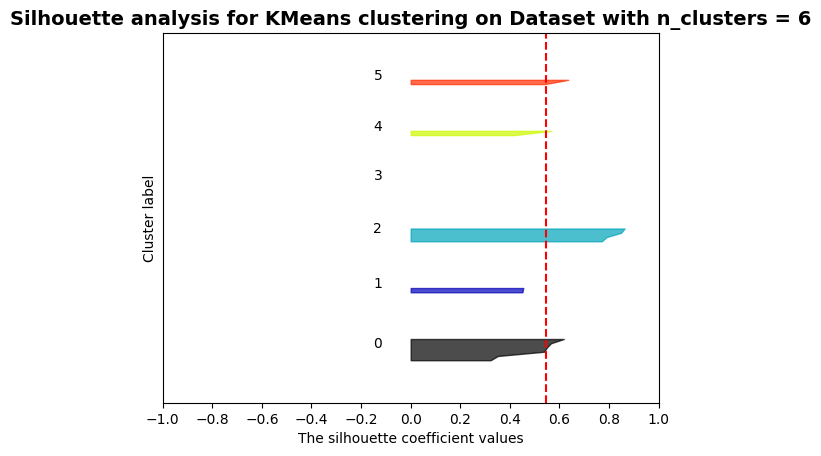

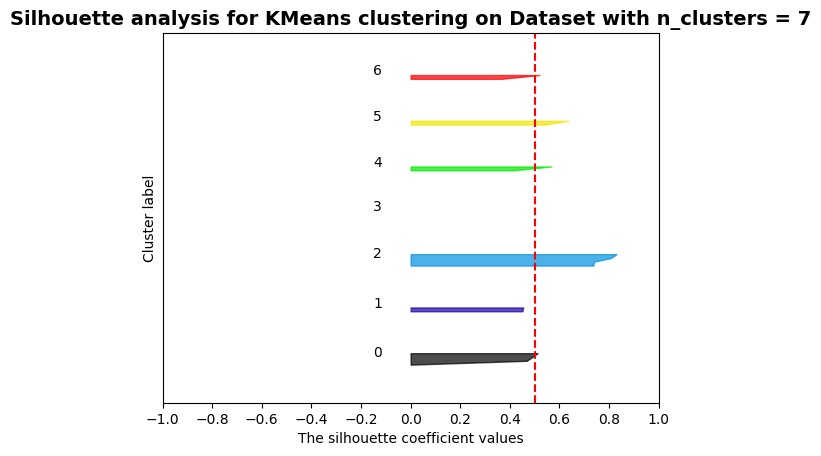

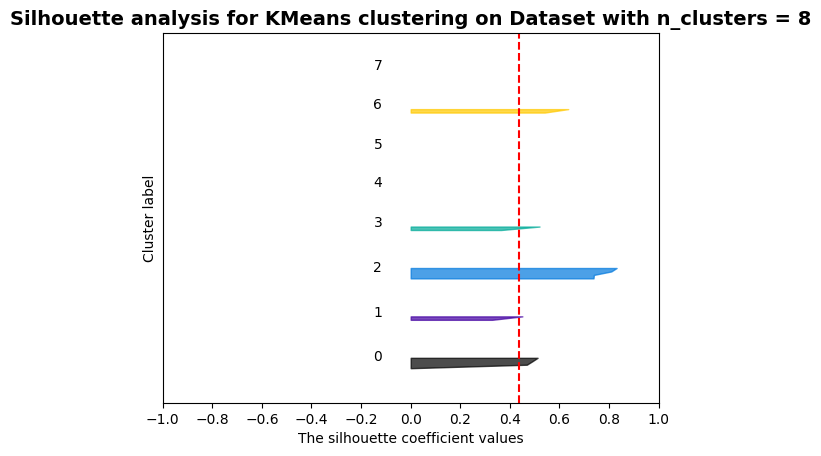

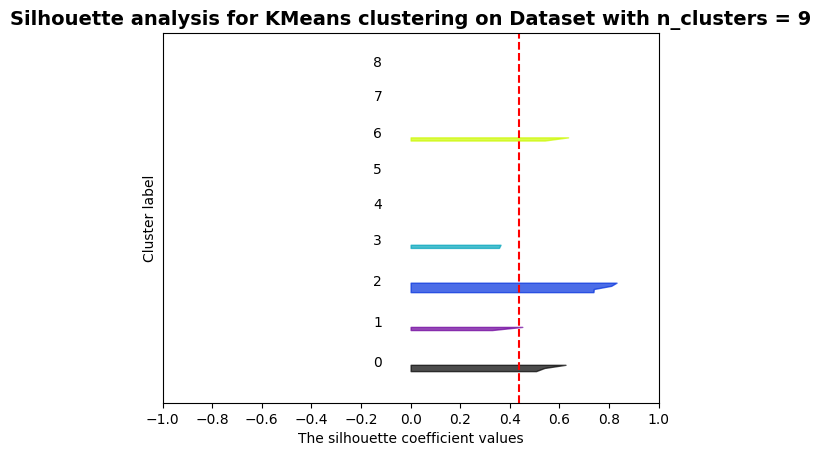

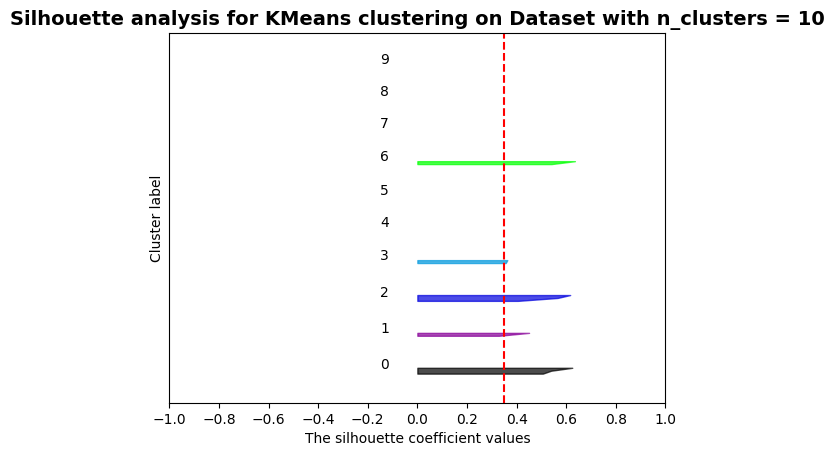

-------------------------------- Silhouette Values for LVG (2014/15) --------------------------------
For # clusters =  2 The average silhouette_score is :  0.7506355176383858
For # clusters =  3 The average silhouette_score is :  0.5511551542850941
For # clusters =  4 The average silhouette_score is :  0.5326726673094256
For # clusters =  5 The average silhouette_score is :  0.5284932469321447
For # clusters =  6 The average silhouette_score is :  0.5330945514201534
For # clusters =  7 The average silhouette_score is :  0.46575705619908014
For # clusters =  8 The average silhouette_score is :  0.4439646633134497
For # clusters =  9 The average silhouette_score is :  0.42323303359189235
For # clusters =  10 The average silhouette_score is :  0.4211846205270466


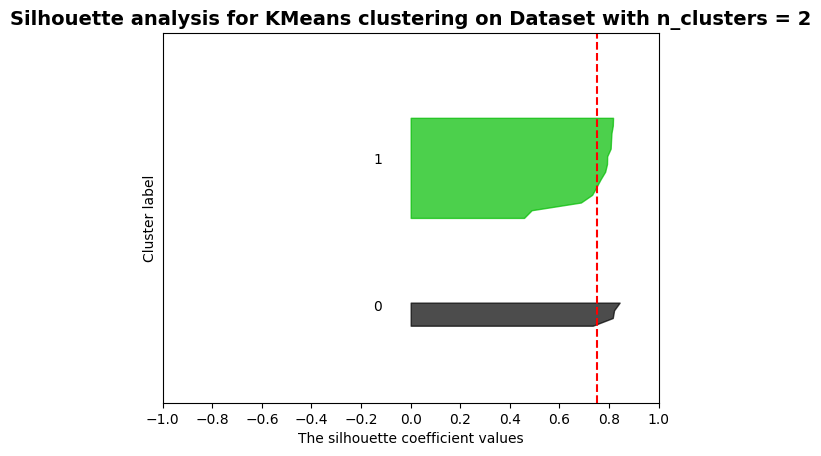

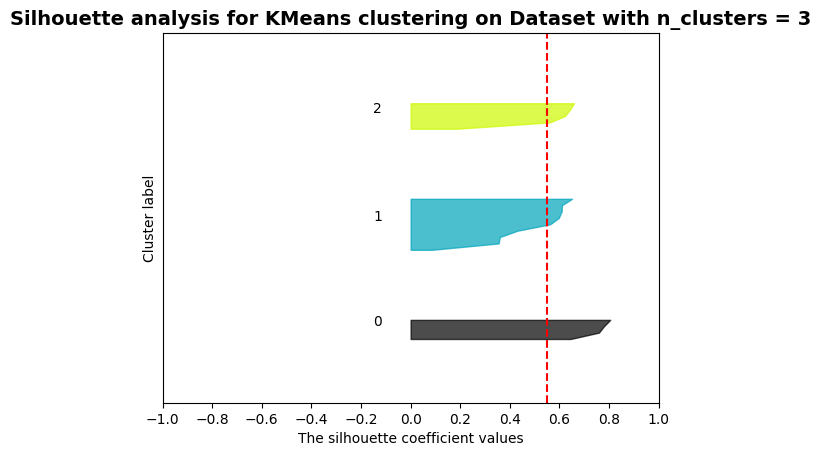

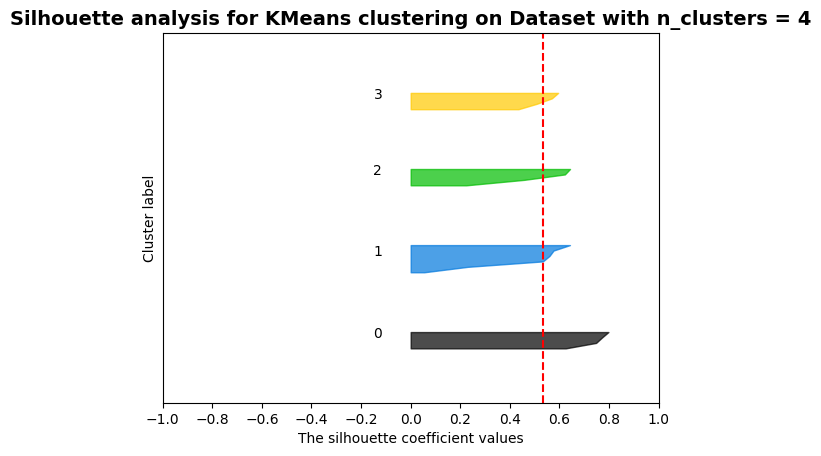

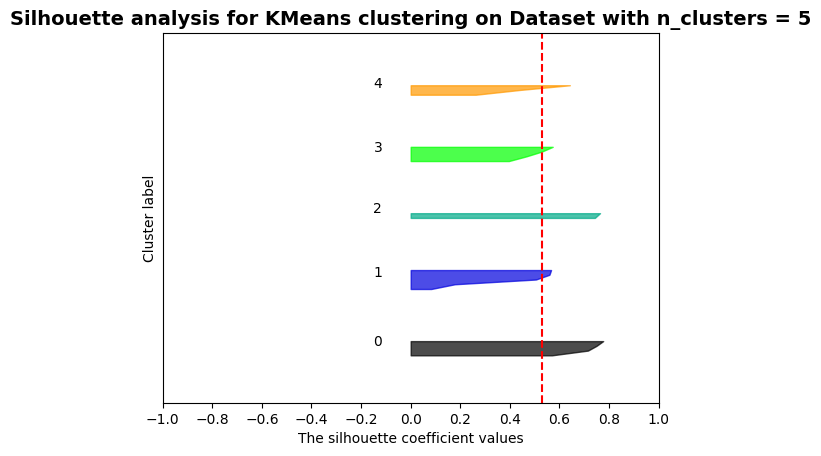

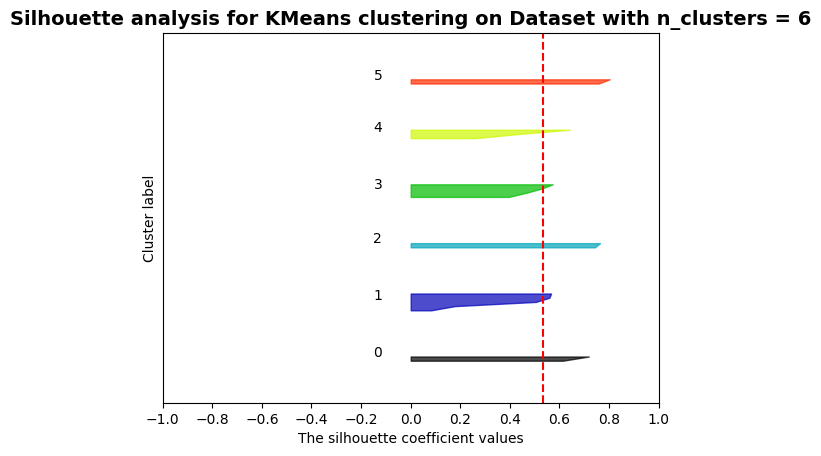

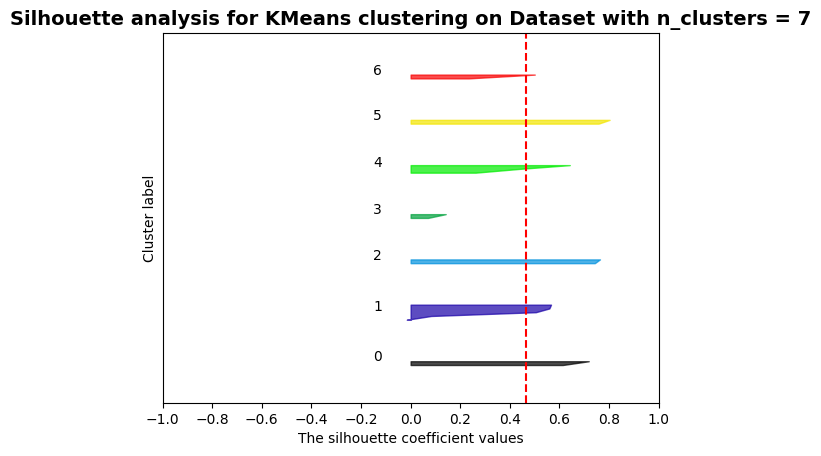

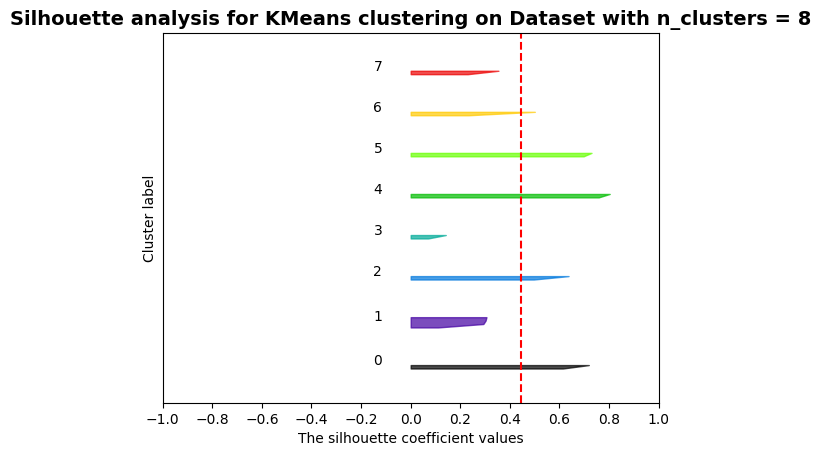

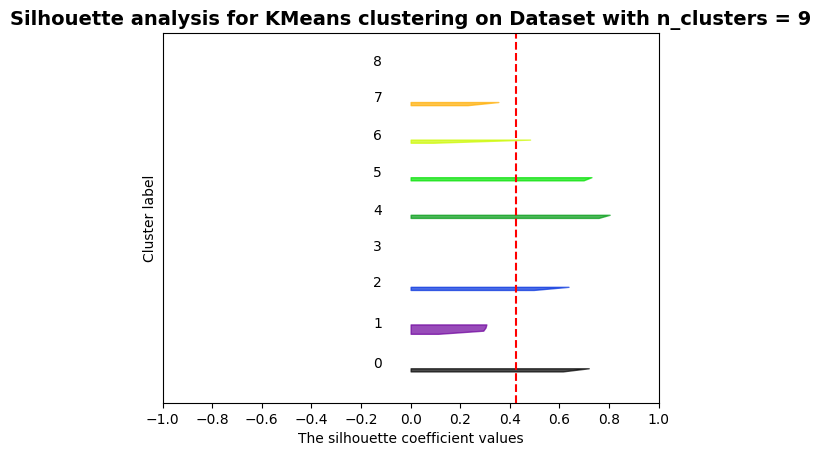

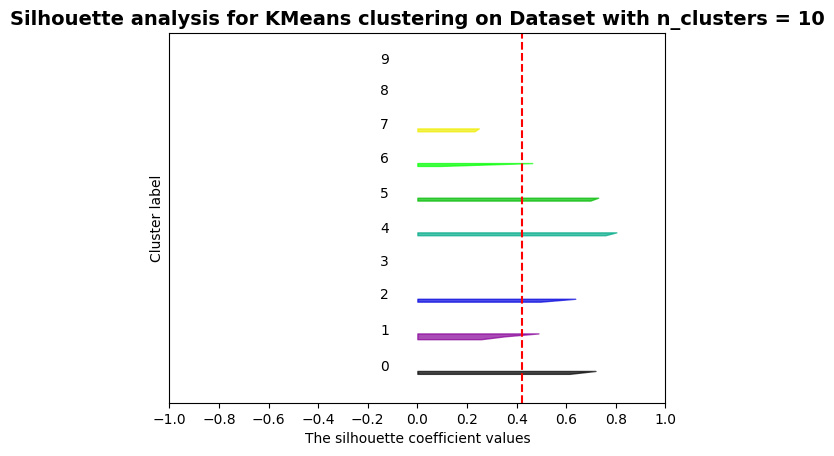

-------------------------------- Silhouette Values for LVG with xG (2015/16) --------------------------------
For # clusters =  2 The average silhouette_score is :  0.6241958775236621
For # clusters =  3 The average silhouette_score is :  0.5396593606119586
For # clusters =  4 The average silhouette_score is :  0.4609958066920075
For # clusters =  5 The average silhouette_score is :  0.35519112253991114
For # clusters =  6 The average silhouette_score is :  0.3227288101623421
For # clusters =  7 The average silhouette_score is :  0.3557895011270971
For # clusters =  8 The average silhouette_score is :  0.26162313469706305
For # clusters =  9 The average silhouette_score is :  0.2756138536370409
For # clusters =  10 The average silhouette_score is :  0.26032691112768686


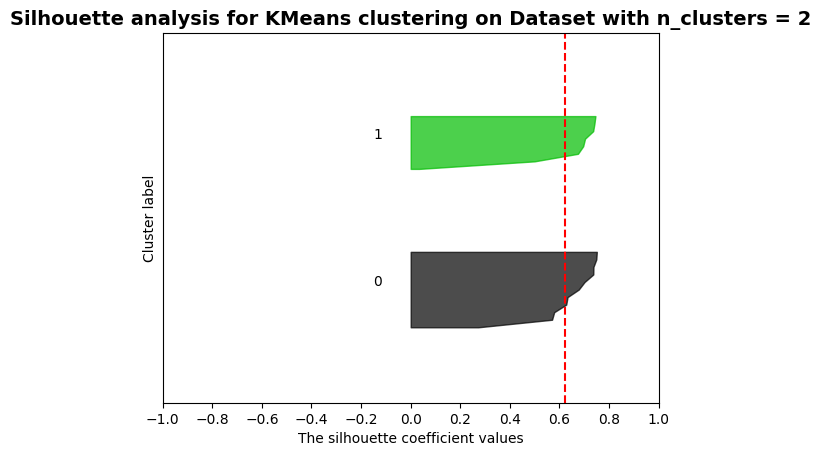

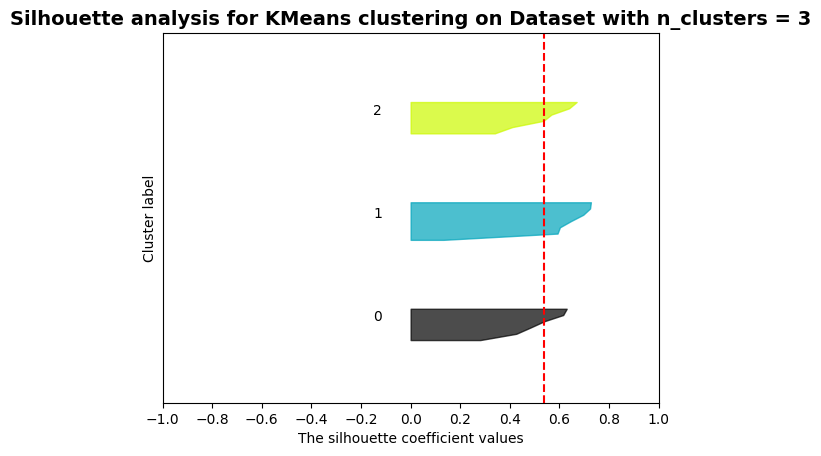

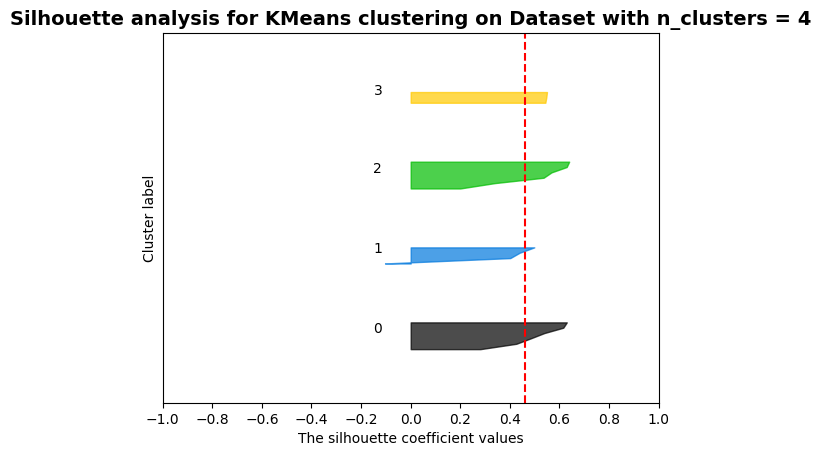

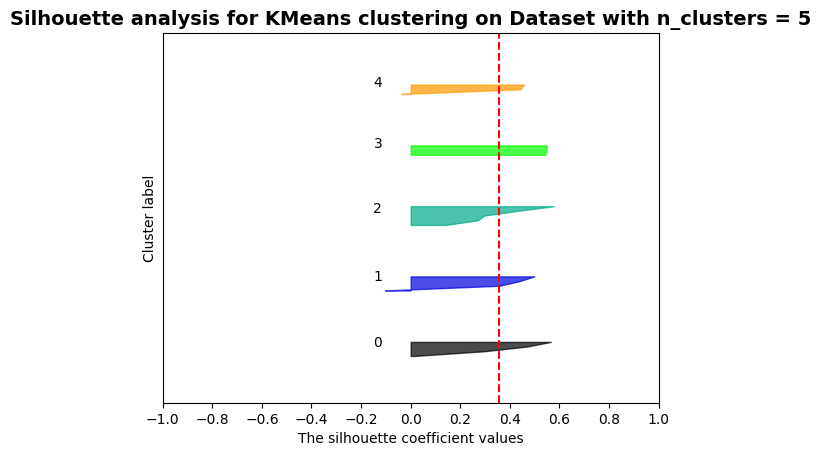

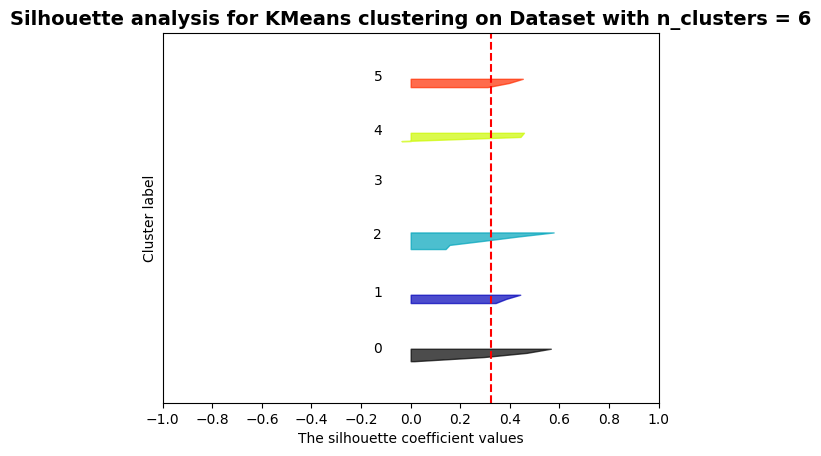

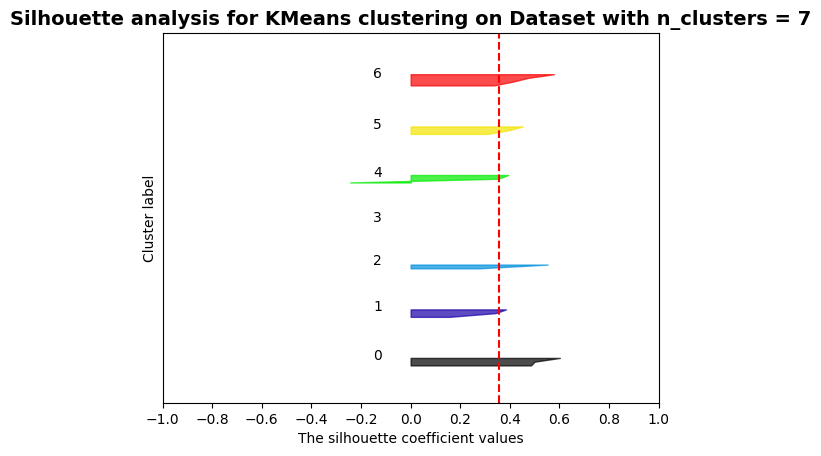

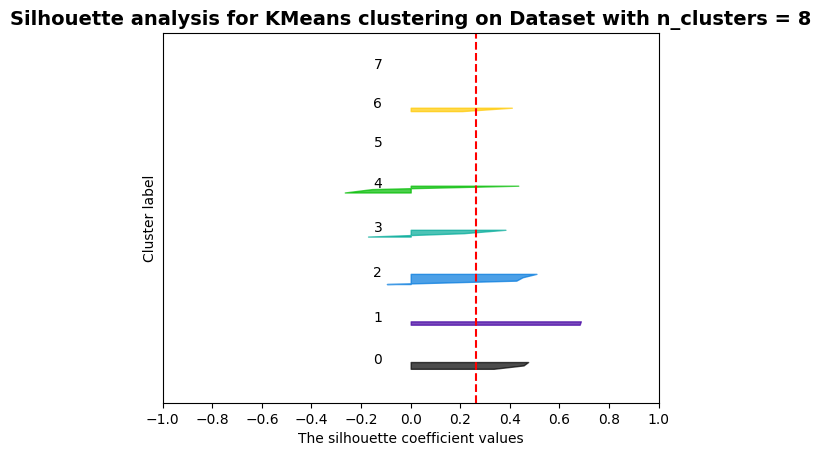

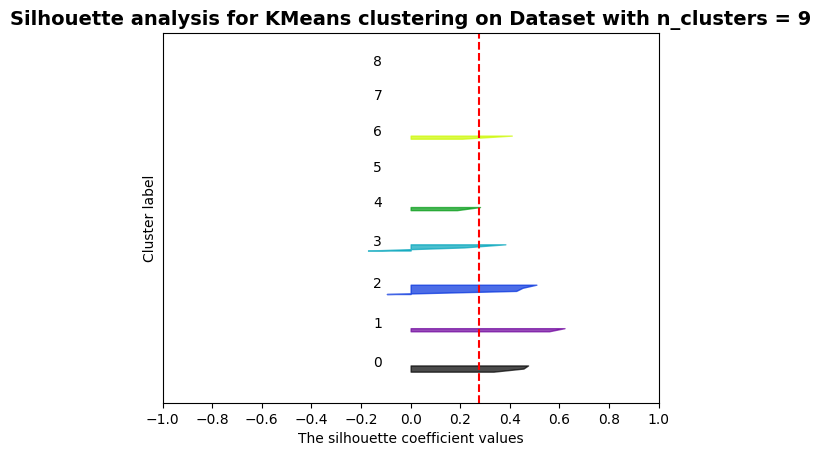

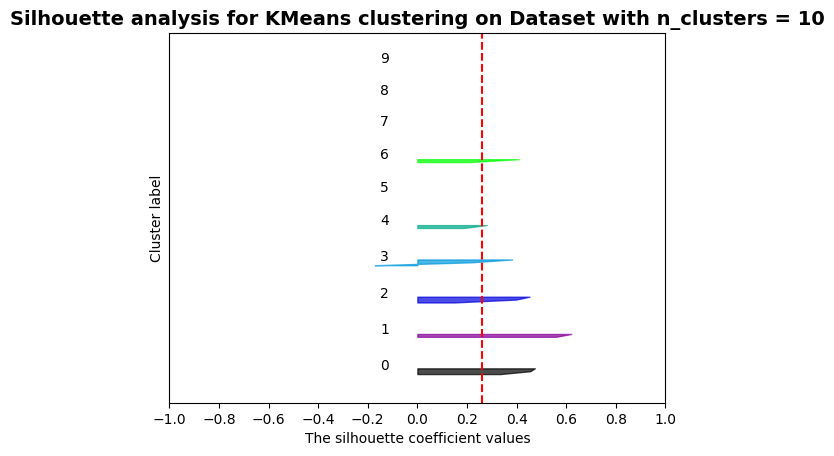

-------------------------------- Silhouette Values for Jose and OGS Interim Period (2016/17, 2017/18 and 2018/19) --------------------------------
For # clusters =  2 The average silhouette_score is :  0.6628546043896228
For # clusters =  3 The average silhouette_score is :  0.5573738761358586
For # clusters =  4 The average silhouette_score is :  0.5053417551022126
For # clusters =  5 The average silhouette_score is :  0.5347910775264979
For # clusters =  6 The average silhouette_score is :  0.533911741203003
For # clusters =  7 The average silhouette_score is :  0.4854329660672316
For # clusters =  8 The average silhouette_score is :  0.43533207369815613
For # clusters =  9 The average silhouette_score is :  0.4078015691416441
For # clusters =  10 The average silhouette_score is :  0.3930308752195519


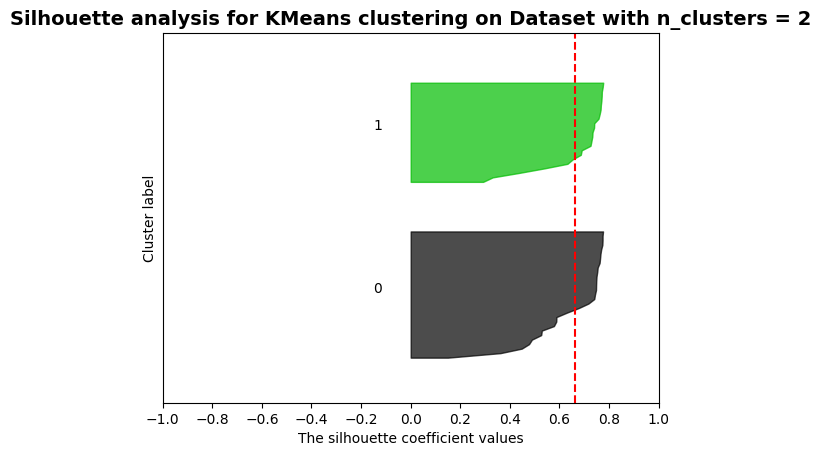

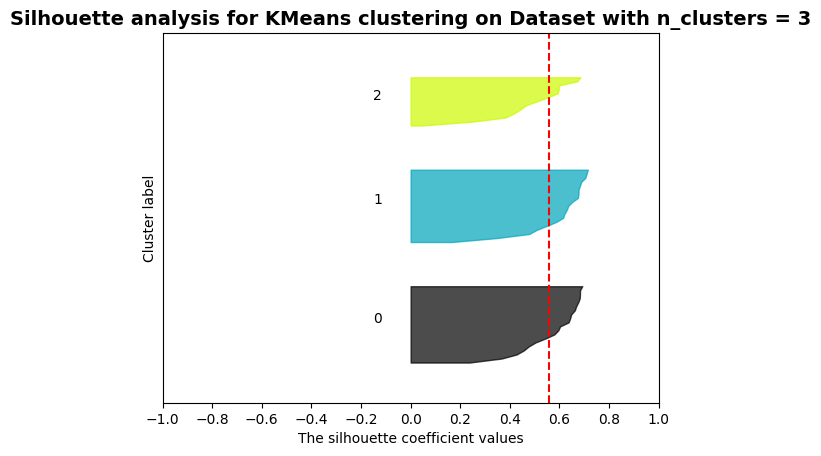

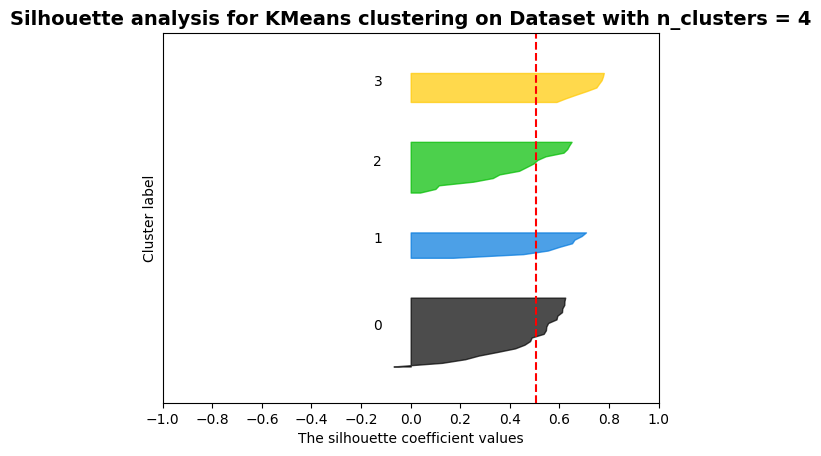

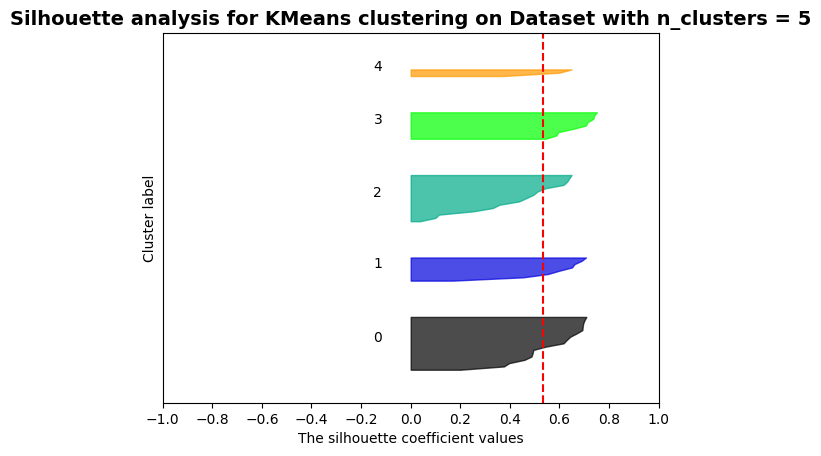

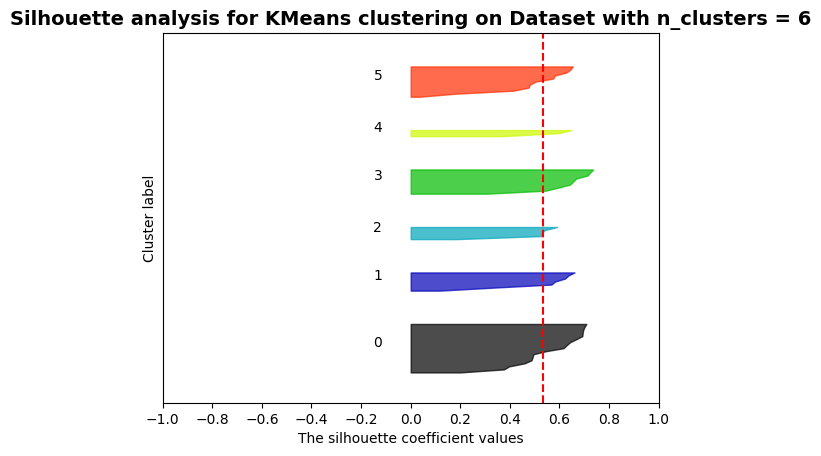

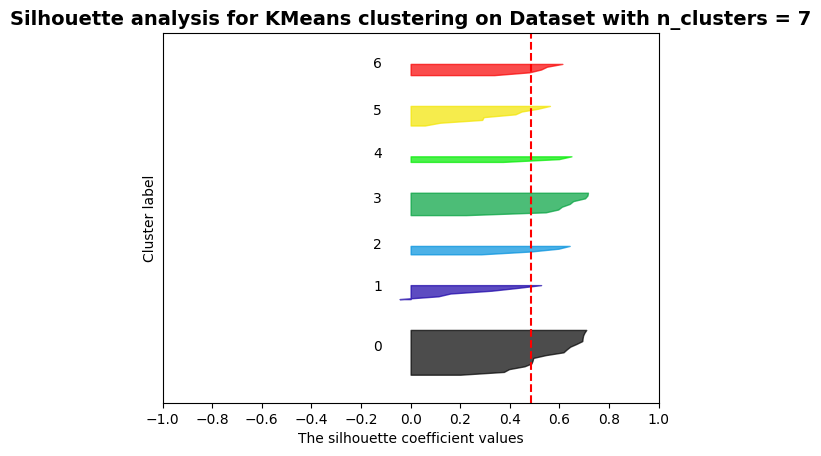

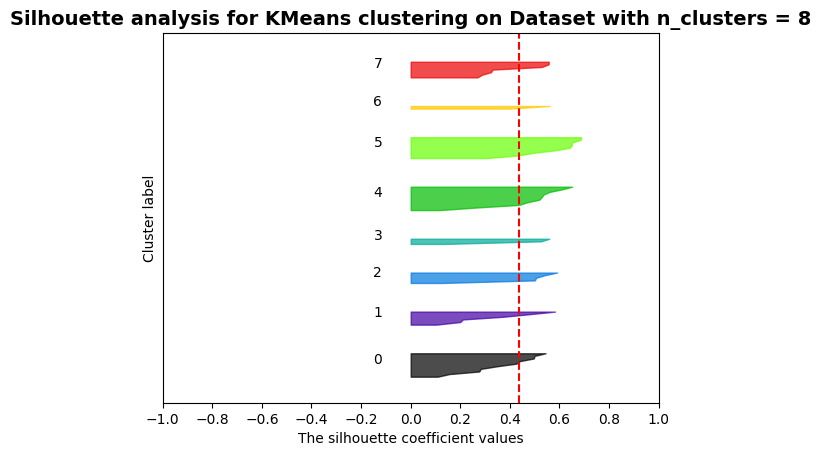

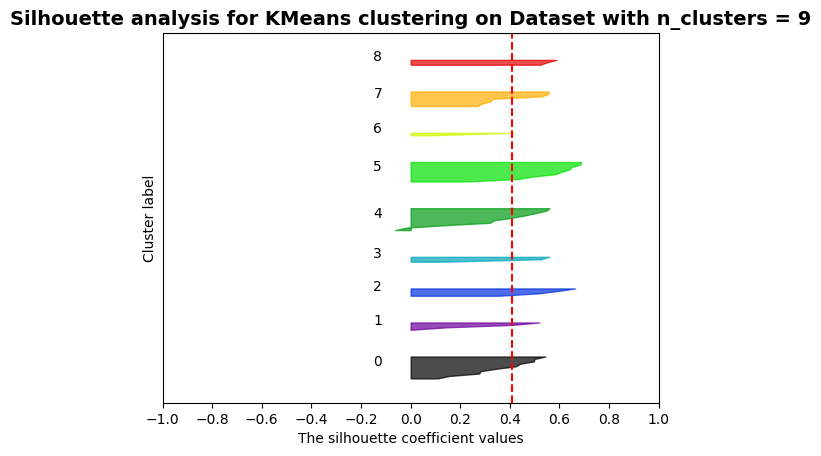

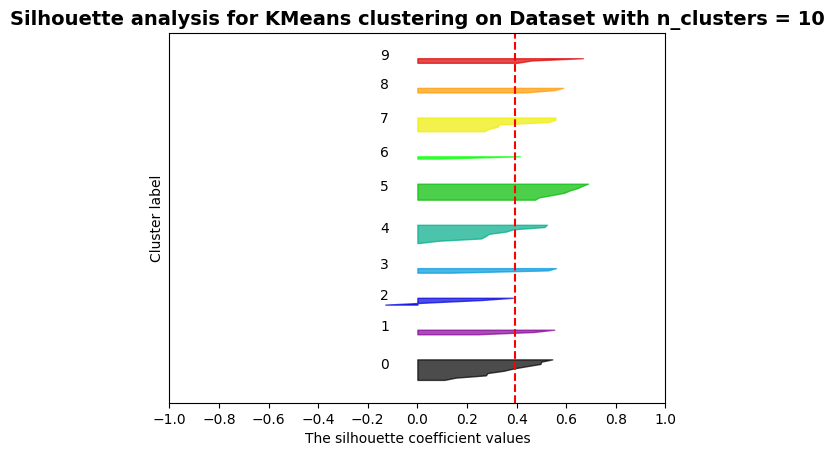

In [7]:
# United Managers #
print("-------------------------------- Silhouette Values for David Moyes (2013/14) --------------------------------")
silhouette(united_data[2])
print("-------------------------------- Silhouette Values for LVG (2014/15) --------------------------------")
silhouette(united_data[4])
print("-------------------------------- Silhouette Values for LVG with xG (2015/16) --------------------------------")
silhouette(united_data[3])
print("-------------------------------- Silhouette Values for Jose and OGS Interim Period (2016/17, 2017/18 and 2018/19) --------------------------------")
silhouette(united_data[5])


-------------------------------- Silhouette Values for Pellegrini (2013/14 and 2014/15) --------------------------------
For # clusters =  2 The average silhouette_score is :  0.6859277360671959
For # clusters =  3 The average silhouette_score is :  0.633865327210168
For # clusters =  4 The average silhouette_score is :  0.5630454708194497
For # clusters =  5 The average silhouette_score is :  0.5471912961101704
For # clusters =  6 The average silhouette_score is :  0.5406008053179336
For # clusters =  7 The average silhouette_score is :  0.5564489017214101
For # clusters =  8 The average silhouette_score is :  0.46304394761231504
For # clusters =  9 The average silhouette_score is :  0.4569047010919876
For # clusters =  10 The average silhouette_score is :  0.41402540818363504


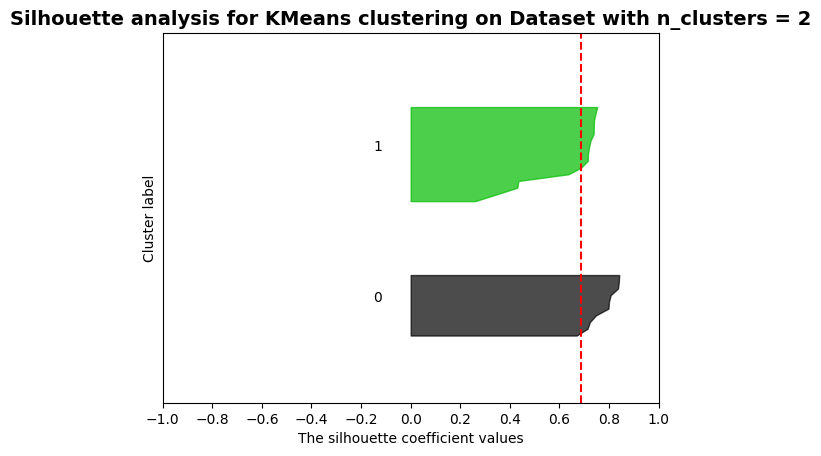

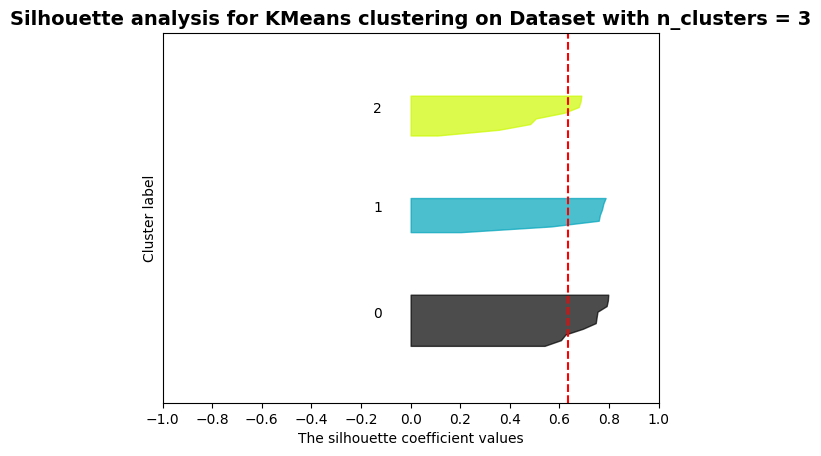

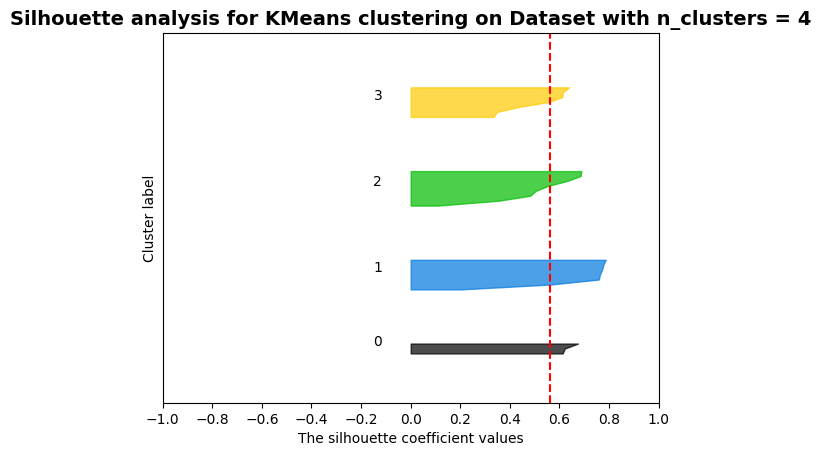

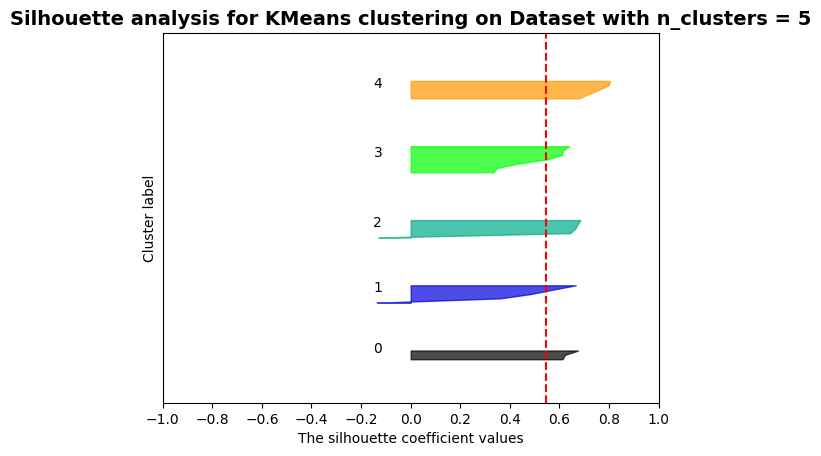

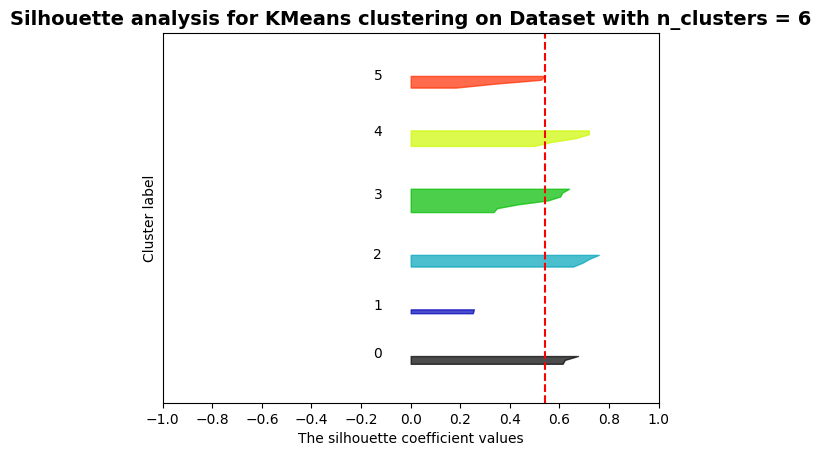

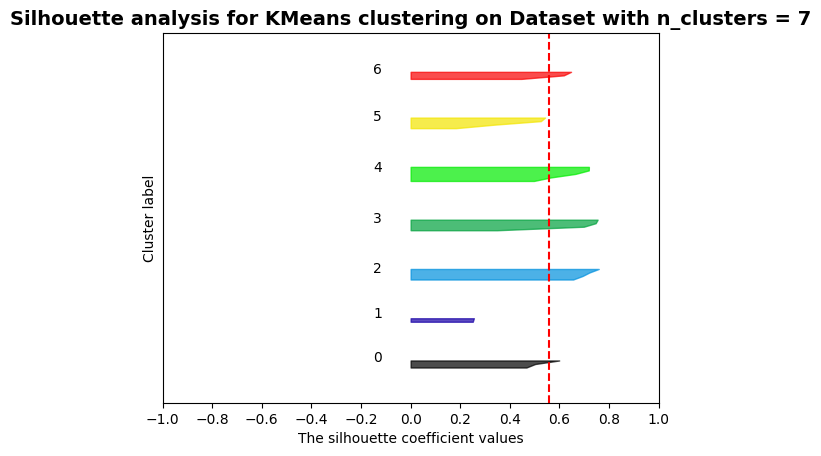

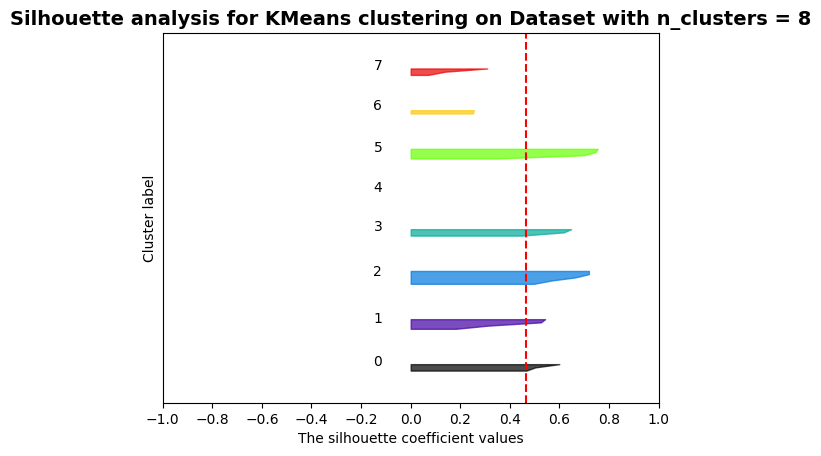

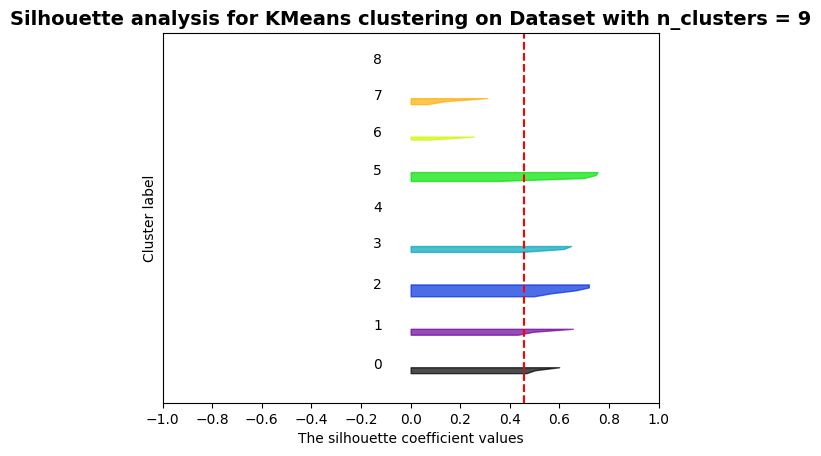

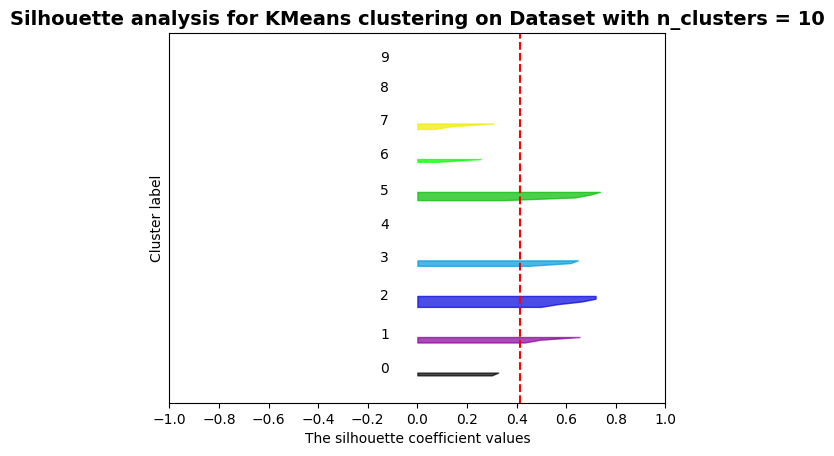

-------------------------------- Silhouette Values for Pellegrini (2015/2016) --------------------------------
For # clusters =  2 The average silhouette_score is :  0.48936550674034573
For # clusters =  3 The average silhouette_score is :  0.6332515104658972
For # clusters =  4 The average silhouette_score is :  0.5719495060349836
For # clusters =  5 The average silhouette_score is :  0.4521580706380209
For # clusters =  6 The average silhouette_score is :  0.39571145140703506
For # clusters =  7 The average silhouette_score is :  0.38134885647435707
For # clusters =  8 The average silhouette_score is :  0.4028006532592691
For # clusters =  9 The average silhouette_score is :  0.3527780849989866
For # clusters =  10 The average silhouette_score is :  0.2945185474481374


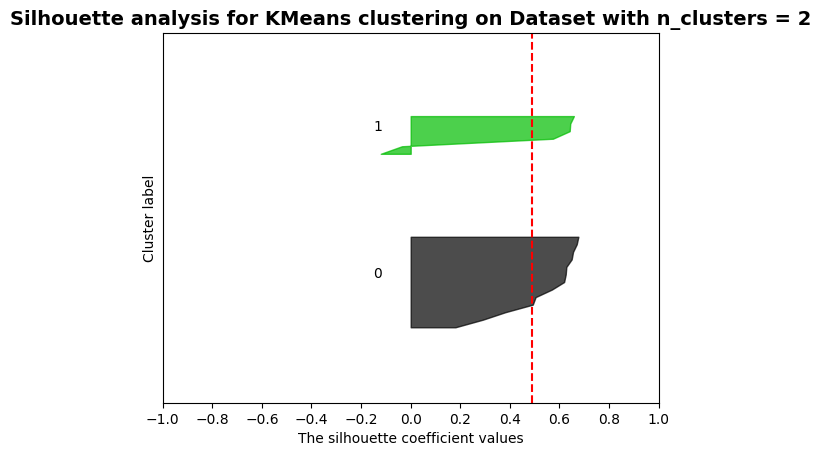

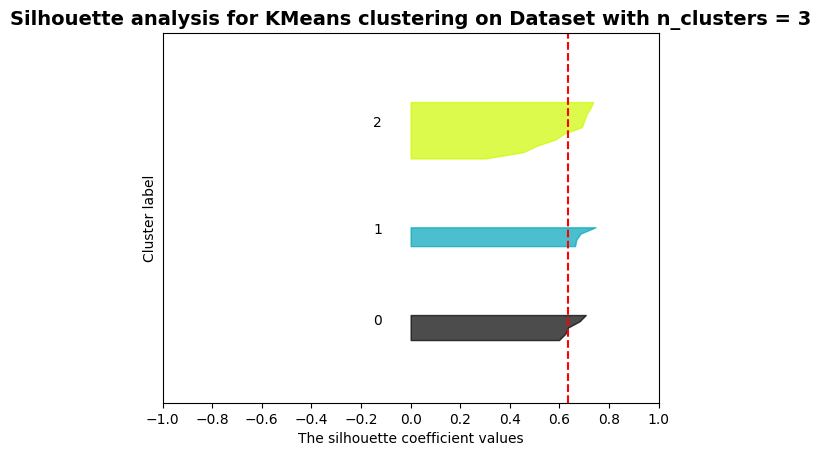

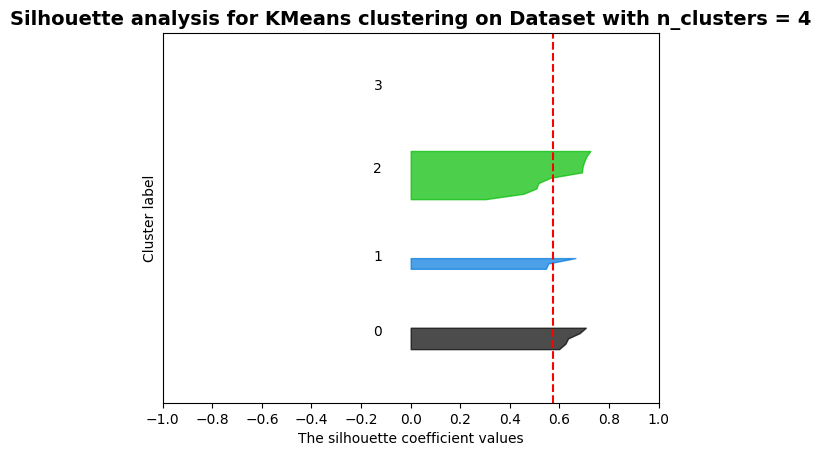

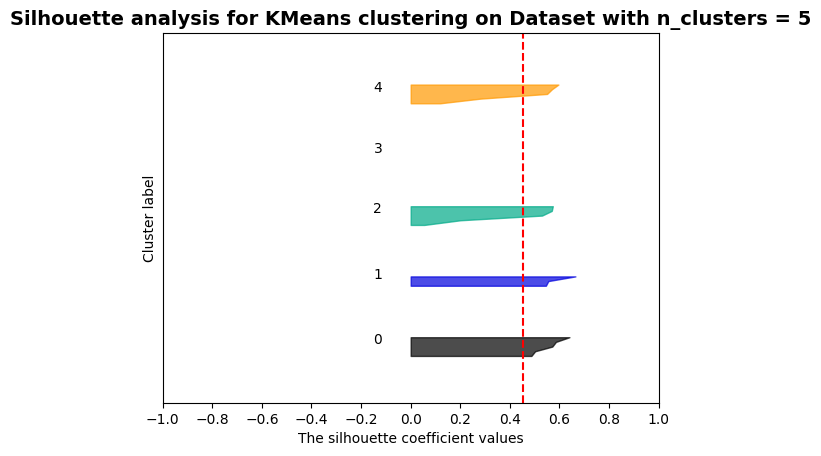

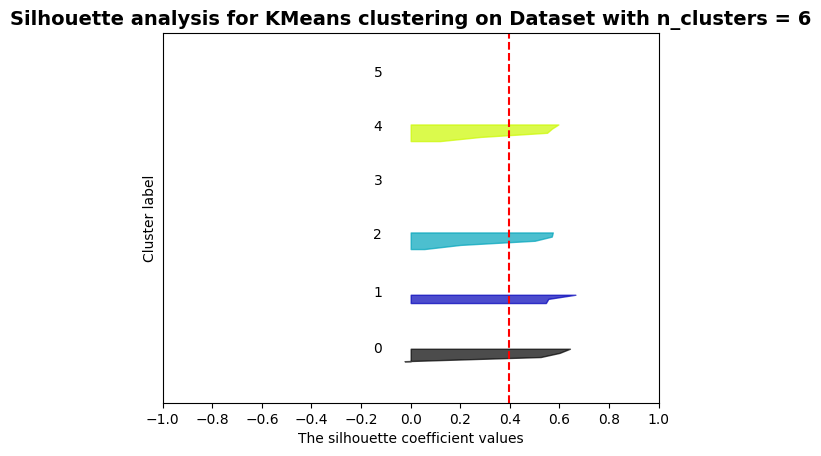

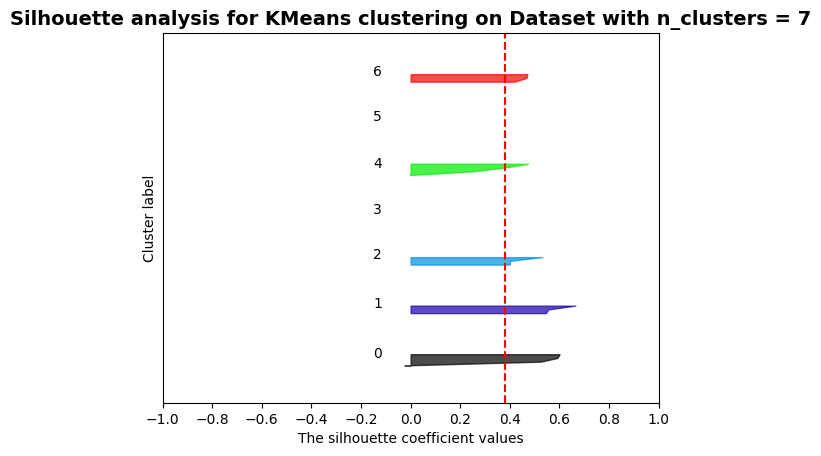

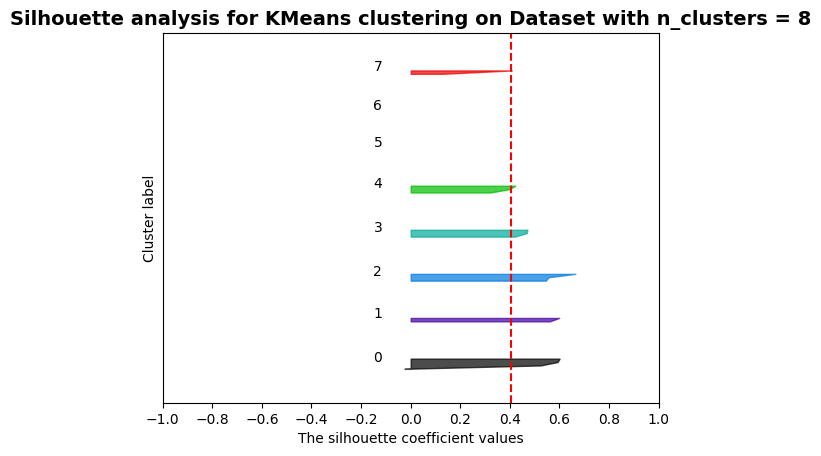

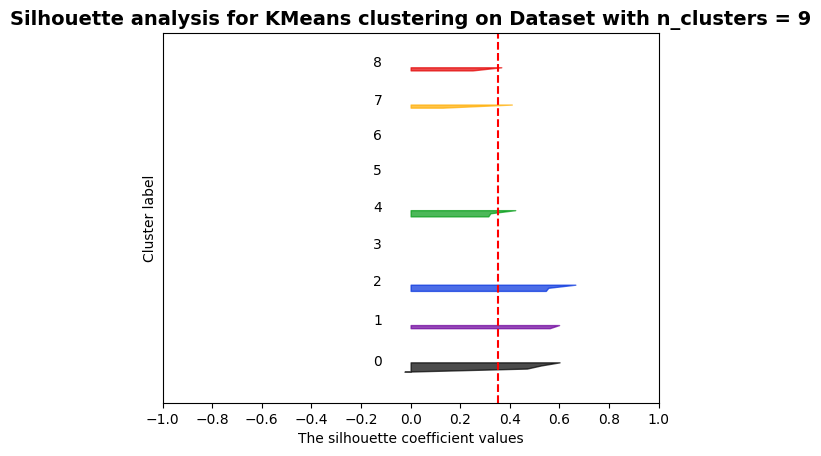

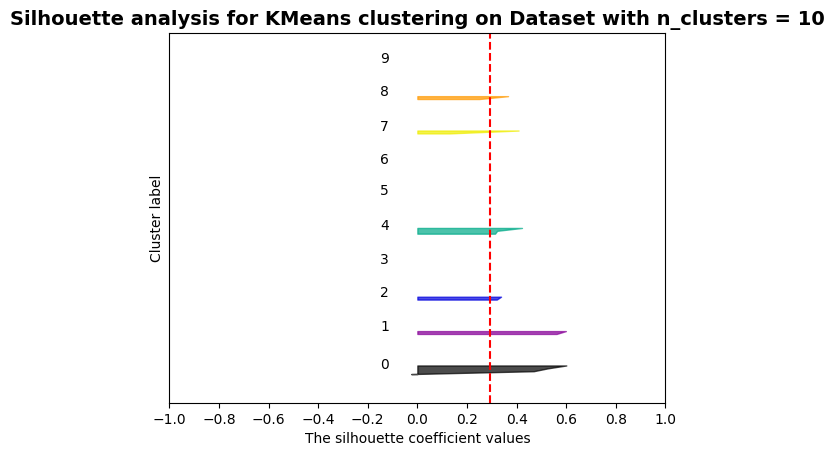

-------------------------------- Silhouette Values for Pep (2016/17, 2017/18 and 2018/19) --------------------------------
For # clusters =  2 The average silhouette_score is :  0.6928595899112764
For # clusters =  3 The average silhouette_score is :  0.6264261891313118
For # clusters =  4 The average silhouette_score is :  0.5865419237077713
For # clusters =  5 The average silhouette_score is :  0.46275898331015825
For # clusters =  6 The average silhouette_score is :  0.44153202097326366
For # clusters =  7 The average silhouette_score is :  0.4149895593169279
For # clusters =  8 The average silhouette_score is :  0.40770898819602663
For # clusters =  9 The average silhouette_score is :  0.3611464374584674
For # clusters =  10 The average silhouette_score is :  0.3439517235943301


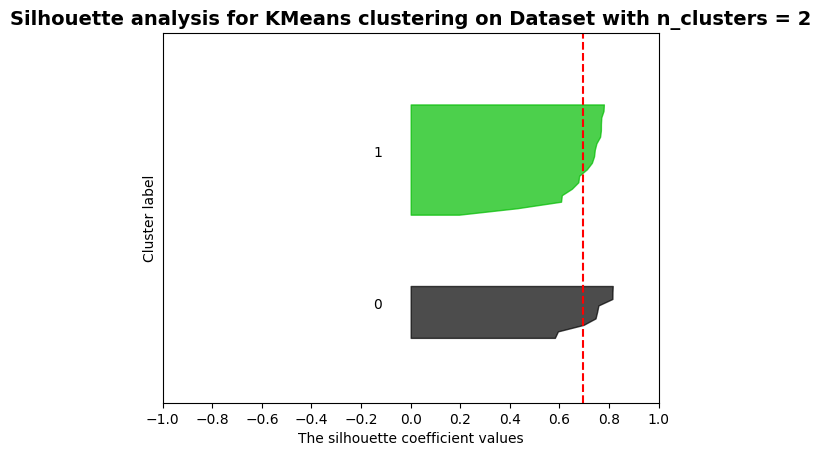

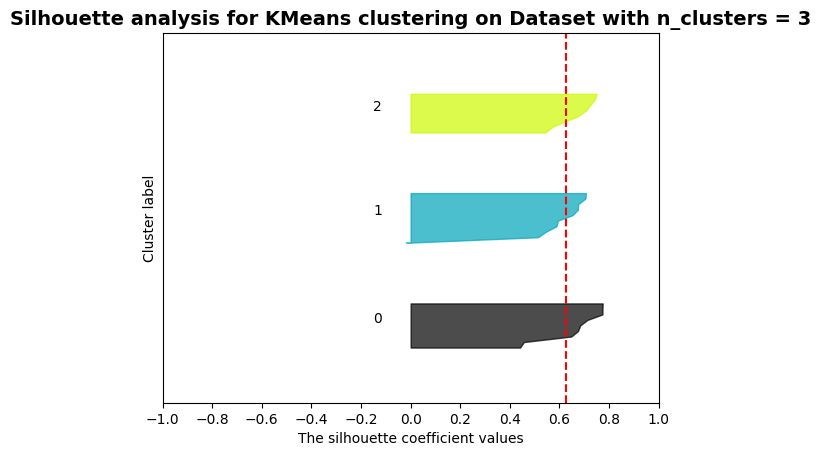

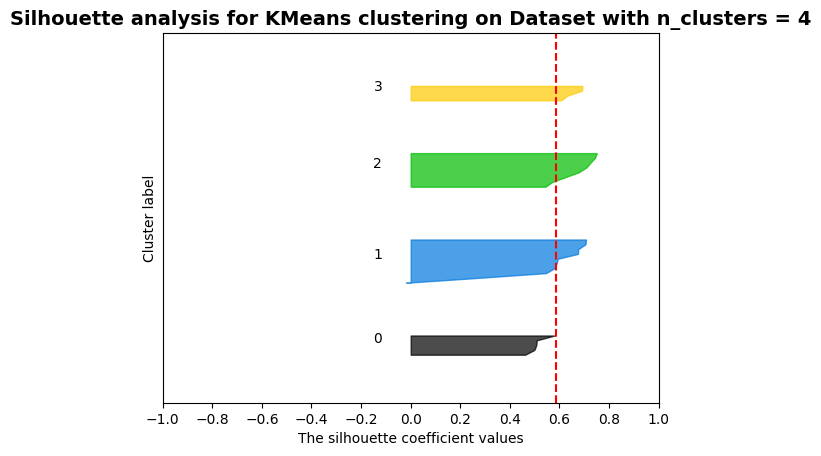

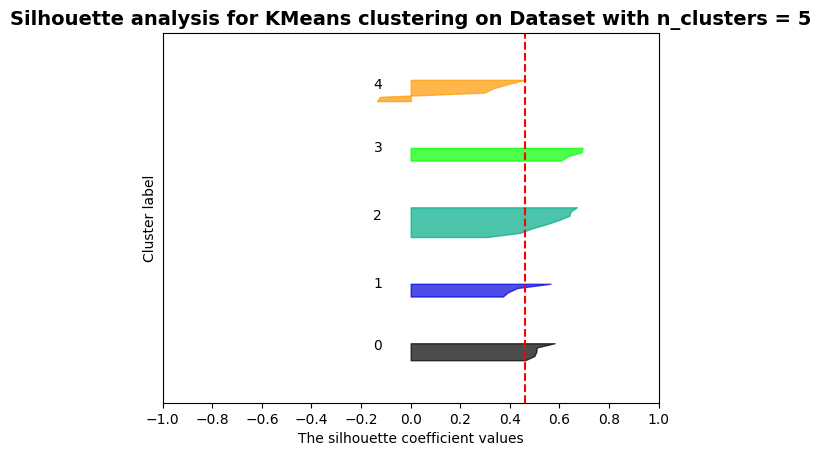

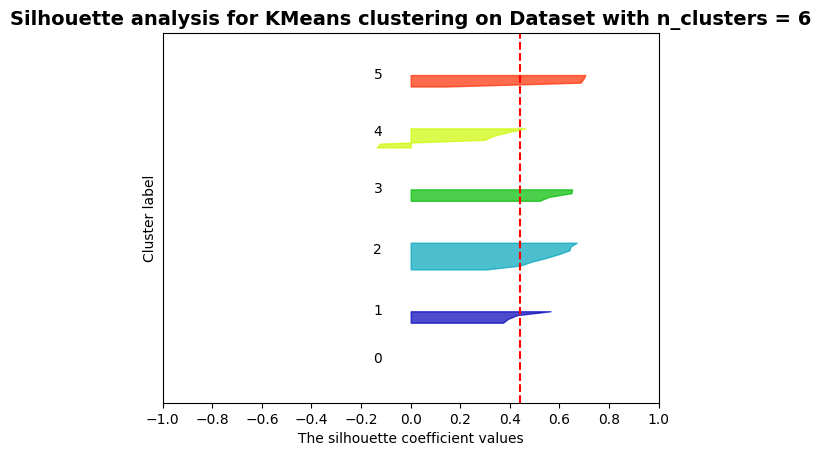

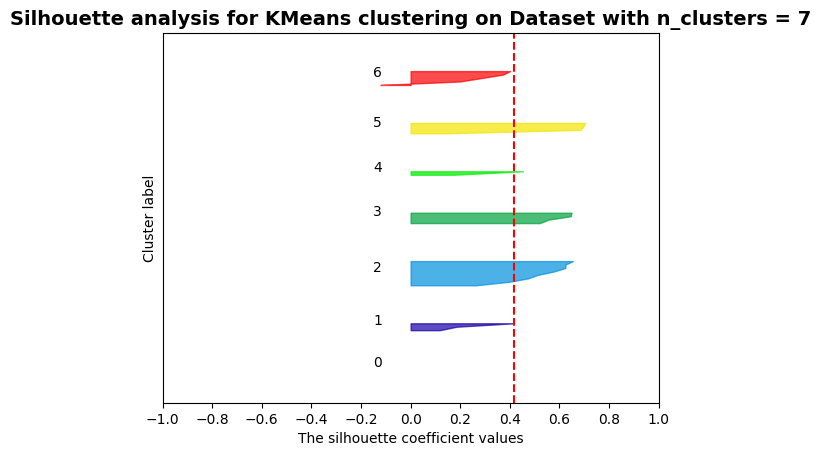

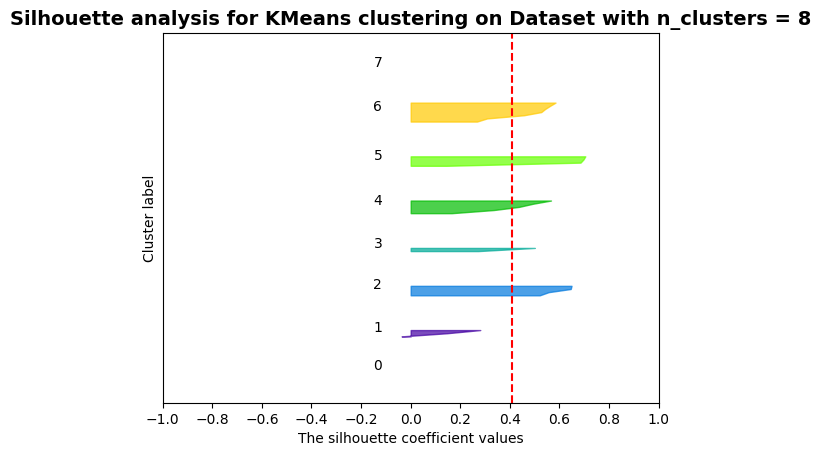

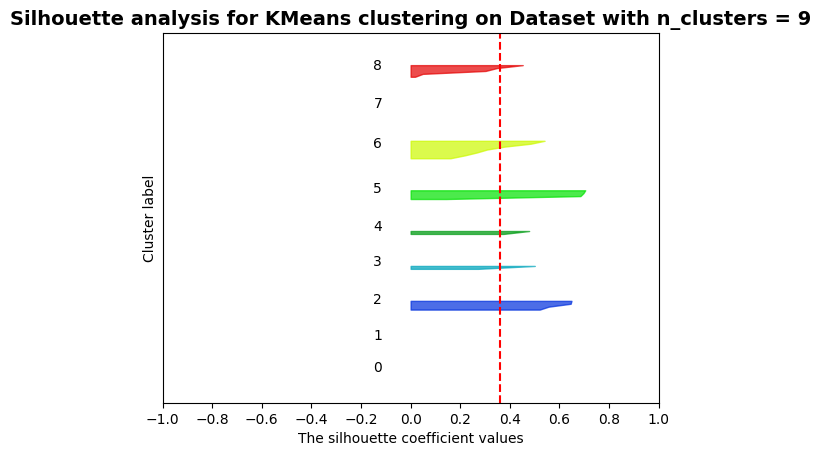

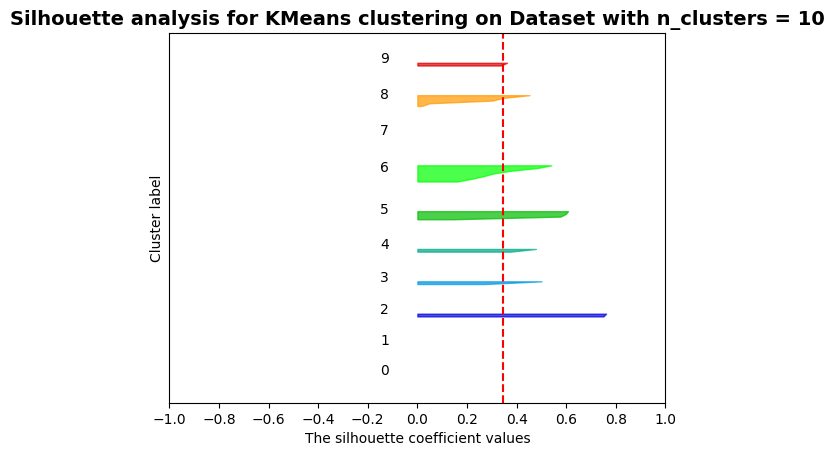

In [8]:
# City Managers #
print("-------------------------------- Silhouette Values for Pellegrini (2013/14 and 2014/15) --------------------------------")
silhouette(city_data[4])
print("-------------------------------- Silhouette Values for Pellegrini (2015/2016) --------------------------------")
silhouette(city_data[3])
print("-------------------------------- Silhouette Values for Pep (2016/17, 2017/18 and 2018/19) --------------------------------")
silhouette(city_data[2])


-------------------------------- Silhouette Values for Pellegrini (2013/14) --------------------------------
For # clusters =  2 The average silhouette_score is :  0.702831800121393
For # clusters =  3 The average silhouette_score is :  0.7160350803901365
For # clusters =  4 The average silhouette_score is :  0.6577622541095512
For # clusters =  5 The average silhouette_score is :  0.5133101564096966
For # clusters =  6 The average silhouette_score is :  0.48831893002324056
For # clusters =  7 The average silhouette_score is :  0.36286949828996184
For # clusters =  8 The average silhouette_score is :  0.29263491423573745
For # clusters =  9 The average silhouette_score is :  0.08875851710151376
For # clusters =  10 The average silhouette_score is :  0.08160161275979229


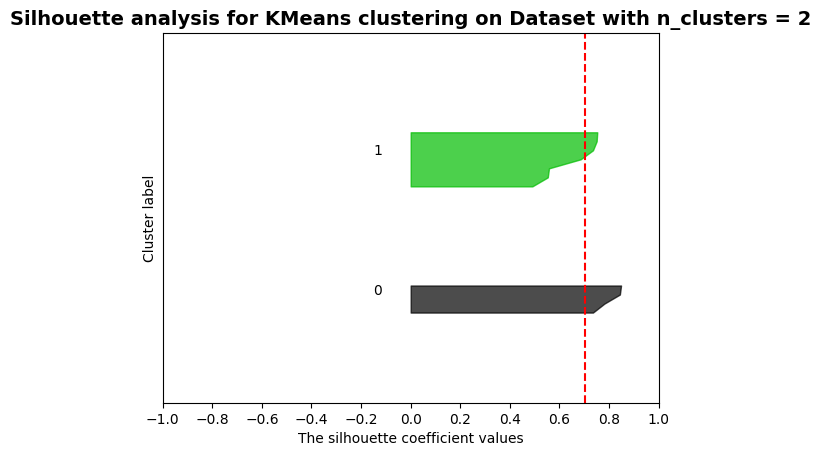

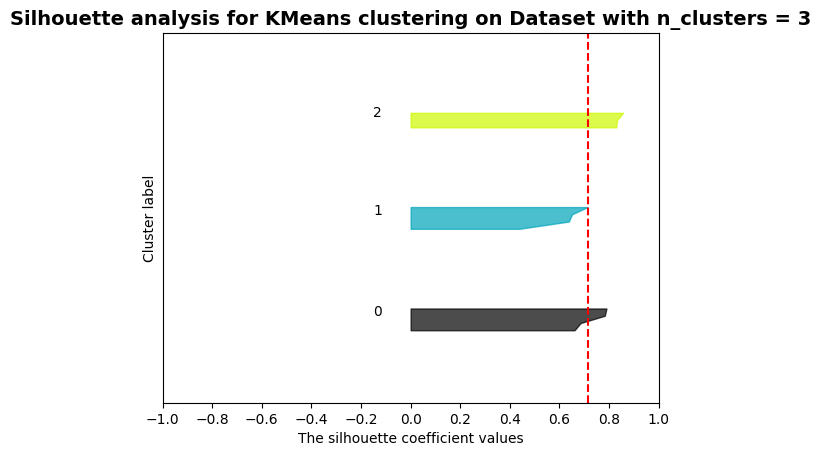

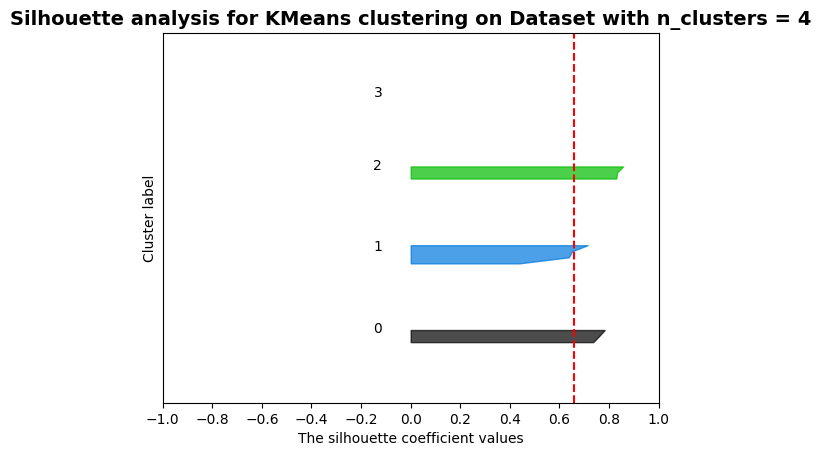

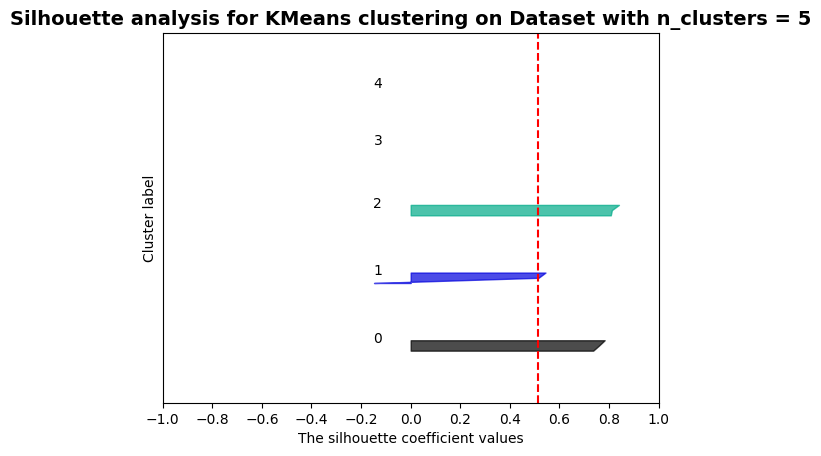

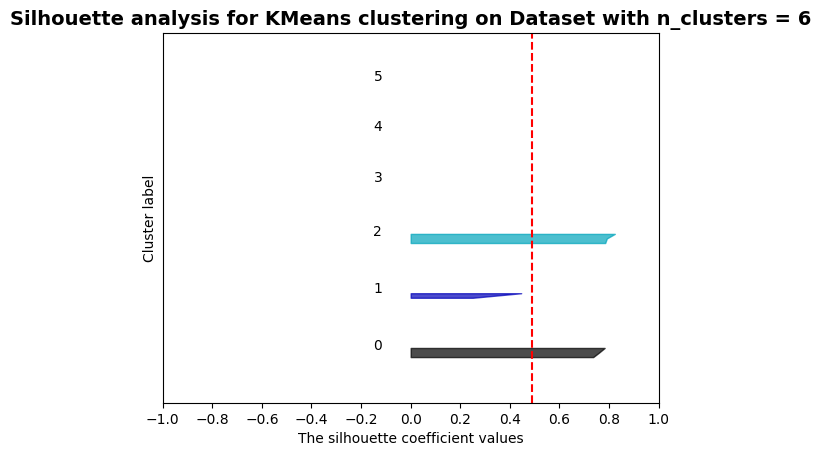

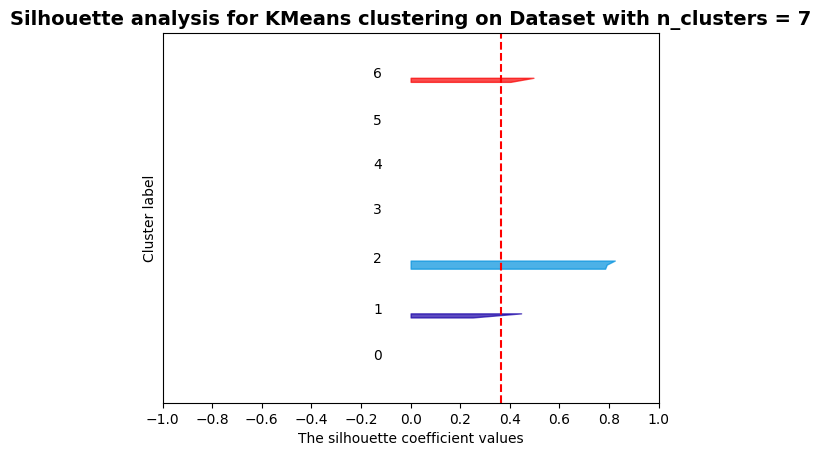

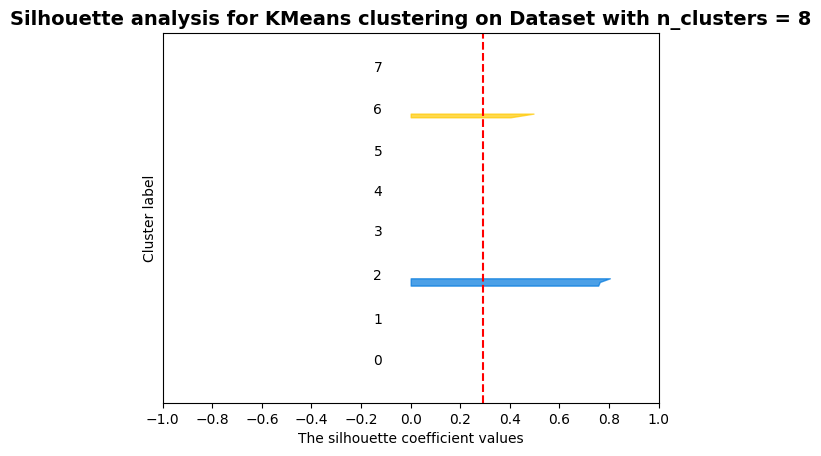

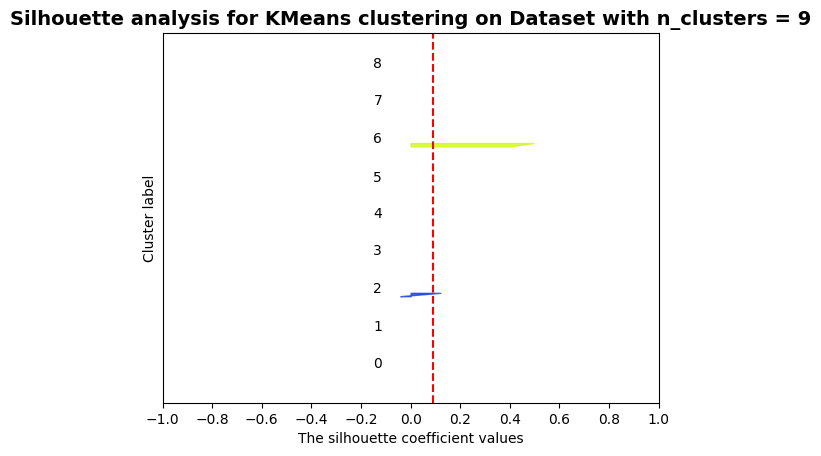

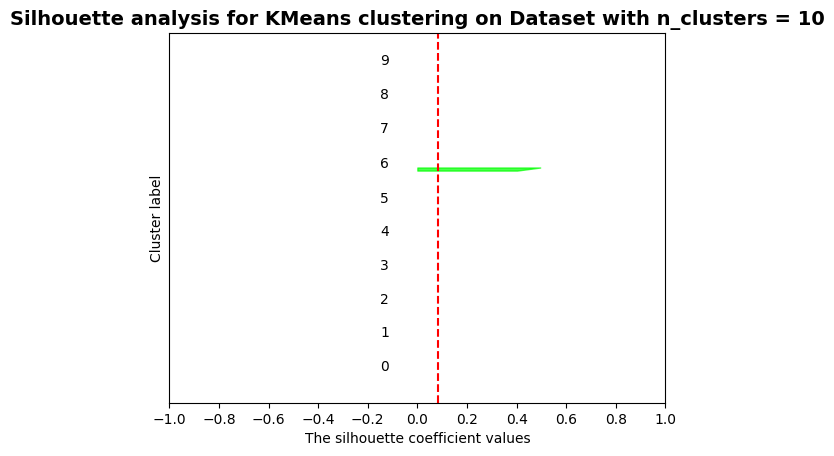

-------------------------------- Silhouette Values for Pep (2017/18 and 2018/19) --------------------------------
For # clusters =  2 The average silhouette_score is :  0.7821019262890888
For # clusters =  3 The average silhouette_score is :  0.6050487420827153
For # clusters =  4 The average silhouette_score is :  0.5090407802313724
For # clusters =  5 The average silhouette_score is :  0.527956825714362
For # clusters =  6 The average silhouette_score is :  0.5582039239855192
For # clusters =  7 The average silhouette_score is :  0.48072149955590726
For # clusters =  8 The average silhouette_score is :  0.4233596594163022
For # clusters =  9 The average silhouette_score is :  0.3323498942433129
For # clusters =  10 The average silhouette_score is :  0.16095666205767384


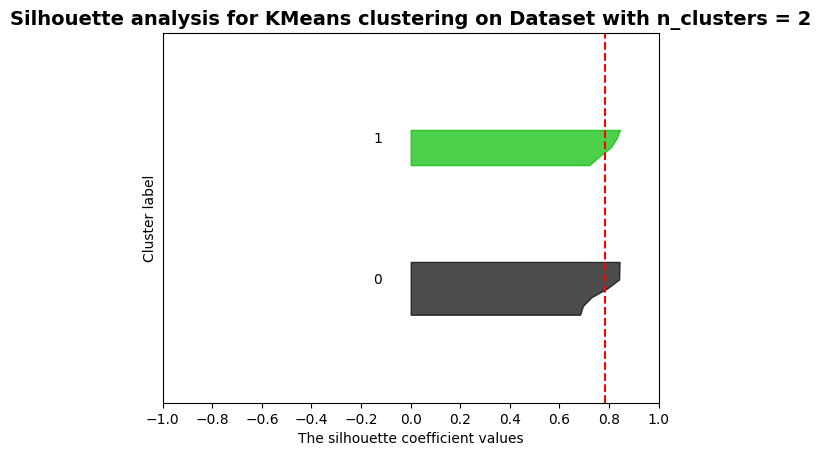

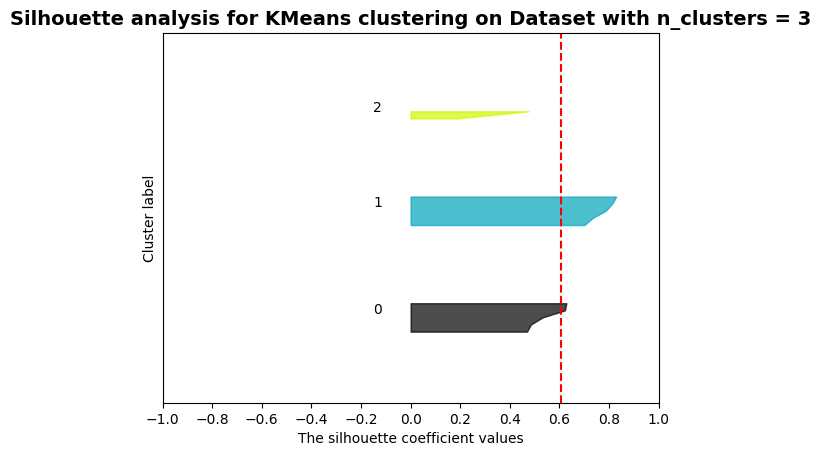

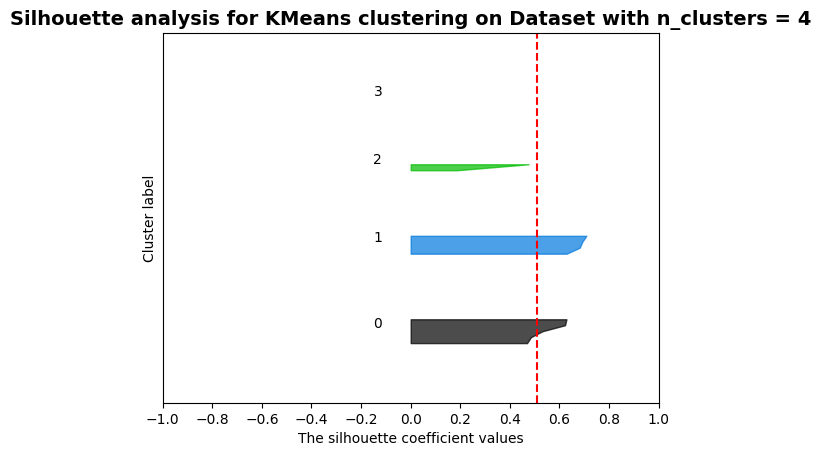

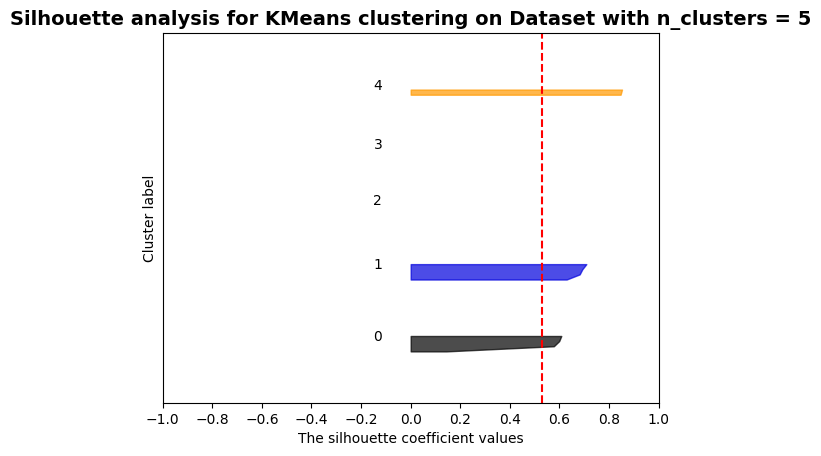

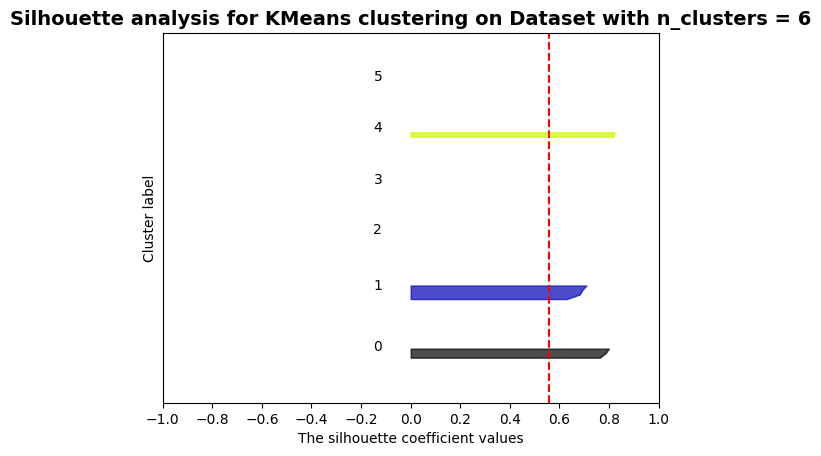

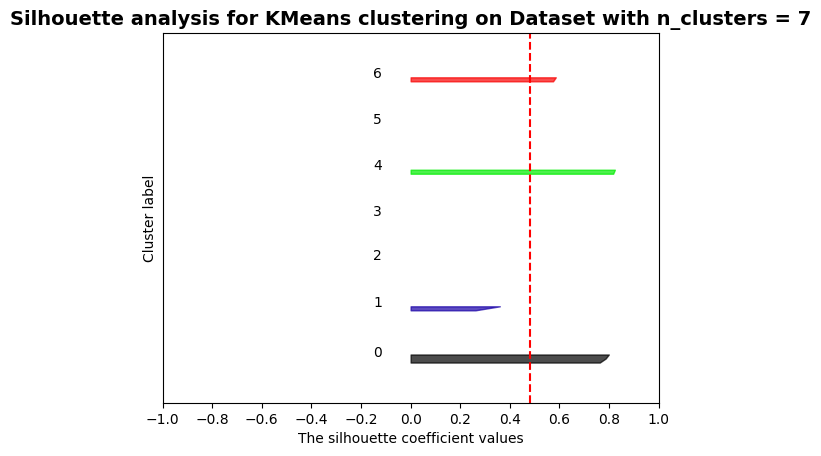

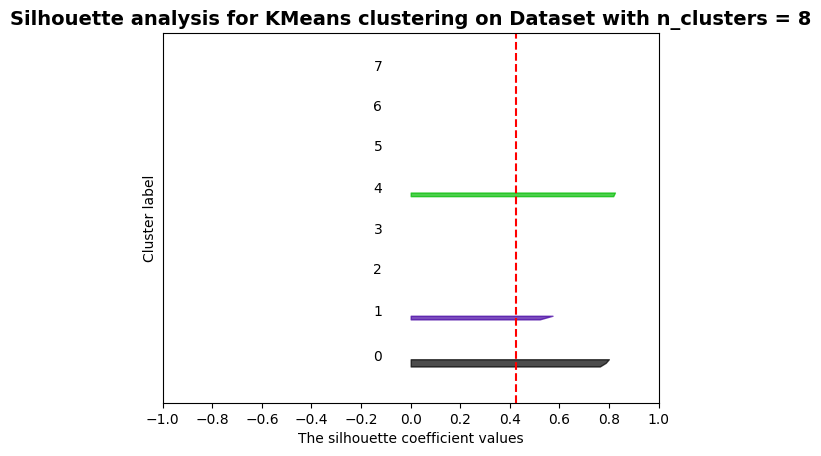

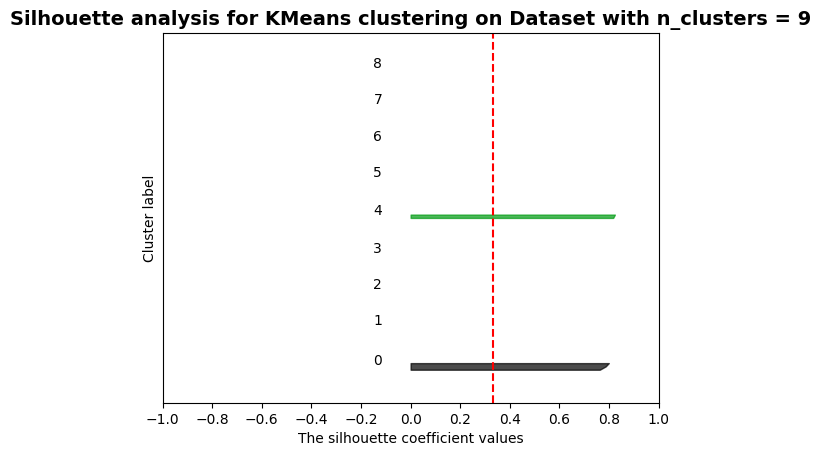

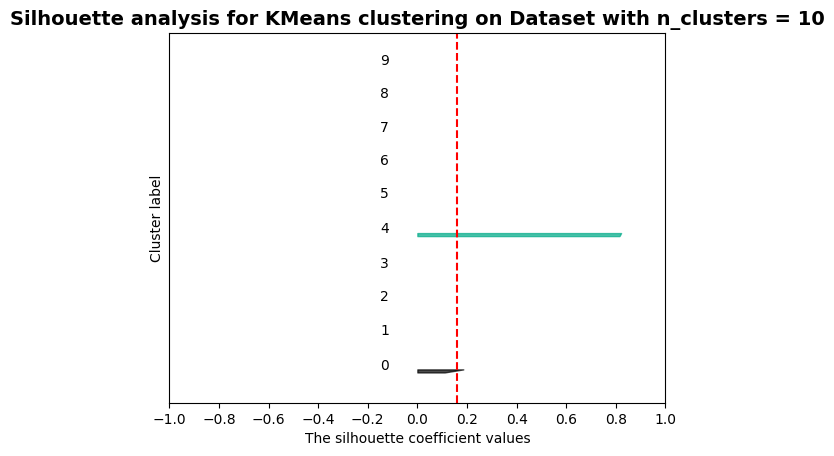

In [9]:
# City's Title Winning Seasons #
print("-------------------------------- Silhouette Values for Pellegrini (2013/14) --------------------------------")
silhouette(city_data[5])
print("-------------------------------- Silhouette Values for Pep (2017/18 and 2018/19) --------------------------------")
silhouette(city_data[6])